# Stochastic Time Series Forecasting
## An Ensemble Learning Approach
### Exploratory Data Analysis
### ML Zoomcamp Capstone Project

Cohort 2023-2024

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import seaborn as sns
sns.set(style="whitegrid", palette="muted")

FREQS = {'H': 24, 'D': 1,
         'M': 12, 'Q': 4,
         'W':1, 'Y': 1}

### Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jblanco89/ML_Zoomcamp_Capstone_Project/main/matlab/simulations.csv', sep=',')
df.head()

output_data1  output_data2  output_data3  output_data4  output_data5  \
0      0.000000   1250.000000   1250.000000   1250.000000   1250.000000   
1      0.004167   1250.000417   1250.000417   1250.000417   1250.000417   
2      0.008333   1250.069978   1250.027373   1250.033560   1250.091427   
3      0.012500   1250.029913   1250.008363   1250.067850   1249.977618   
4      0.016667   1250.149400   1250.024966   1249.873366   1249.850328   

   output_data6  output_data7  output_data8  output_data9  output_data10  ...  \
0   1250.000000   1250.000000   1250.000000   1250.000000    1250.000000  ...   
1   1250.000417   1250.000417   1250.000417   1250.000417    1250.000417  ...   
2   1249.985702   1249.995304   1249.960850   1250.027096    1249.967991  ...   
3   1249.913051   1250.017999   1249.935625   1249.953535    1249.986116  ...   
4   1249.907112   1249.968949   1250.075288   1250.102559    1250.029402  ...   

   output_data92  output_data93  output_data94  output_data95  output_data96  \
0    1250.000000    1250.000000    1250.000000    1250.000000    1250.000000   
1    1250.000417    1250.000417    1250.000417    1250.000417    1250.000417   
2    1249.946077    1249.980657    1249.973393    1249.954117    1249.945567   
3    1249.923769    1250.017939    1249.932642    1249.997896    1250.003616   
4    1249.937131    1250.000581    1249.786977    1250.037372    1250.177729   

   output_data97  output_data98  output_data99  output_data100  output_data101  
0    1250.000000    1250.000000    1250.000000     1250.000000     1250.000000  
1    1250.000417    1250.000417    1250.000417     1250.000417     1250.000417  
2    1250.015323    1249.974844    1249.968041     1249.967421     1250.011320  
3    1250.032589    1250.072772    1250.014470     1249.908085     1250.050156  
4    1249.956478    1250.104220    1250.022720     1249.983704     1249.986458  

[5 rows x 101 columns]

In [3]:
#preparing datasets for time series analysis
today = datetime.today()
start_date = today - timedelta(weeks=241)
date = pd.date_range(start=start_date, end=today, freq='W')
columns = df.columns
columns_dict = {c: f'store_{i}' for i, c in enumerate(columns, start=0)}

df = df.rename(columns=columns_dict)
df = df.drop(columns='store_0')
df['Dates'] = date
df.head()


store_1      store_2      store_3      store_4      store_5  \
0  1250.000000  1250.000000  1250.000000  1250.000000  1250.000000   
1  1250.000417  1250.000417  1250.000417  1250.000417  1250.000417   
2  1250.069978  1250.027373  1250.033560  1250.091427  1249.985702   
3  1250.029913  1250.008363  1250.067850  1249.977618  1249.913051   
4  1250.149400  1250.024966  1249.873366  1249.850328  1249.907112   

       store_6      store_7      store_8      store_9     store_10  ...  \
0  1250.000000  1250.000000  1250.000000  1250.000000  1250.000000  ...   
1  1250.000417  1250.000417  1250.000417  1250.000417  1250.000417  ...   
2  1249.995304  1249.960850  1250.027096  1249.967991  1249.949913  ...   
3  1250.017999  1249.935625  1249.953535  1249.986116  1249.882874  ...   
4  1249.968949  1250.075288  1250.102559  1250.029402  1249.866379  ...   

      store_92     store_93     store_94     store_95     store_96  \
0  1250.000000  1250.000000  1250.000000  1250.000000  1250.000000   
1  1250.000417  1250.000417  1250.000417  1250.000417  1250.000417   
2  1249.980657  1249.973393  1249.954117  1249.945567  1250.015323   
3  1250.017939  1249.932642  1249.997896  1250.003616  1250.032589   
4  1250.000581  1249.786977  1250.037372  1250.177729  1249.956478   

      store_97     store_98     store_99    store_100  \
0  1250.000000  1250.000000  1250.000000  1250.000000   
1  1250.000417  1250.000417  1250.000417  1250.000417   
2  1249.974844  1249.968041  1249.967421  1250.011320   
3  1250.072772  1250.014470  1249.908085  1250.050156   
4  1250.104220  1250.022720  1249.983704  1249.986458   

                       Dates  
0 2019-05-05 14:54:17.349333  
1 2019-05-12 14:54:17.349333  
2 2019-05-19 14:54:17.349333  
3 2019-05-26 14:54:17.349333  
4 2019-06-02 14:54:17.349333  

[5 rows x 101 columns]

In [4]:
main_dir = '/content/drive/MyDrive/ML-Zoomcamp-2023/Capstone/'
def time_series_analysis(df: pd.DataFrame,
                         column:str,
                         lags:int=20,
                         significance:float = 0.05,
                         stationary_adj:bool = True,
                         plot_name:str ='Sales of ',
                         save_fig:bool=False,
                         color:str='b') -> dict:
    df_ts = df[['Dates', column]].copy()
    df_ts['Dates'] = pd.to_datetime(df_ts['Dates'])
    df_ts.set_index('Dates', inplace=True)

    # This is a naive decomposition
    # To learn more about seasonal descompose please check:
    # https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

    seasonal_result = seasonal_decompose(df_ts[column],
                                         model='additive')
    # print(seasonal_result.trend)
    seasonal_fig = seasonal_result.plot()
    seasonal_fig.suptitle(f'{plot_name}{column}')
    seasonal_fig.set_size_inches((12, 8))
    seasonal_fig.tight_layout()
    plt.show()


    # ACF and PACF data
    acf_feature = acf(x=df_ts[column],
                    nlags=lags,
                    qstat=True,
                    fft=True,
                    alpha=0.5,
                    missing="drop")

    pacf_feature = pacf(df_ts[column],
                        nlags=int(df_ts.shape[0]*0.49),
                        alpha=0.5)

    acf_corr = acf_feature[0]
    acf_confint = acf_feature[1]
    acf_pv = acf_feature[3]
    pacf_corr = pacf_feature[0]
    pacf_confint = pacf_feature[1]

    # ACF and PACF plots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

    plot_acf(df_ts[column], lags=lags, ax=ax1, color=color)
    ax1.set_title(f'Autocorrelation Function (ACF) of {plot_name}{column}')

    plot_pacf(df_ts[column], lags=int(df_ts.shape[0]*0.49), ax=ax2, color=color)
    ax2.set_title(f'Partial Autocorrelation Function (PACF) of {plot_name}{column}')

    if save_fig:
        seasonal_fig.savefig(f'{main_dir}img/{plot_name}{column}_seasonal_plot.png', format='png', bbox_inches='tight')
        fig.savefig(f'{main_dir}img/{plot_name}{column}_acf_pacf_plot.png', format='png', bbox_inches='tight')

    plt.show()

    # Stationarity test using Augmented Dickey-Fuller unit root method
    # check: https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

    adf_result = adfuller(df_ts[column])
    adf = adf_result[0]
    adf_pv = adf_result[1]
    print('------------------------------')
    print('ADF Statistic:', adf)
    print('p-value:', adf_pv)
    if adf_pv > significance:
      print('TS is Stationary')
    else:
      print('TS Non-Stationary')
    print('------------------------------')

    if (stationary_adj == True and adf_pv >= significance):
        df_1diff = df_ts.diff().dropna()
        adf_diff_1 = adfuller(df_1diff)
        adf_diff_2 = 0
        # adf_diff_1_pv = adf_diff_1[1]
        if adf_diff_1[1] >= significance:
            df_2diff = df_1diff.dropna()
            adf_diff_2 = adfuller(df_2diff)
            # adf_diff_2_pv = adf_diff_2[1]
        else:
            adf_diff_1 = 0
    else:
        adf_diff_1 = 0
        adf_diff_2 = 0

    features_dict = {
        'ADF': adf,
        'P-value':adf_pv,
        'ACF Confint': acf_confint,
        'ACF P-Value':acf_pv,
        'PACF': pacf_corr,
        'PACF Confint':pacf_confint,
    }

    df_ts['Trend'] = seasonal_result.trend.fillna(0) if seasonal_result.trend.isna().any() else seasonal_result.trend
    df_ts['Seasonal'] = seasonal_result.seasonal
    df_ts['Residuals'] = seasonal_result.resid.fillna(0) if seasonal_result.resid.isna().any() else seasonal_result.resid
    df_ts['Weights'] = seasonal_result.weights
    df_ts['ACF'] =  acf_corr
    # df_ts['Diff 1'] =  adf_diff_1
    # df_ts['Diff 2'] = adf_diff_2
    df_ts['is_seasonal'] = 1 if seasonal_result.trend.isna().any() else 0


    return df_ts, features_dict

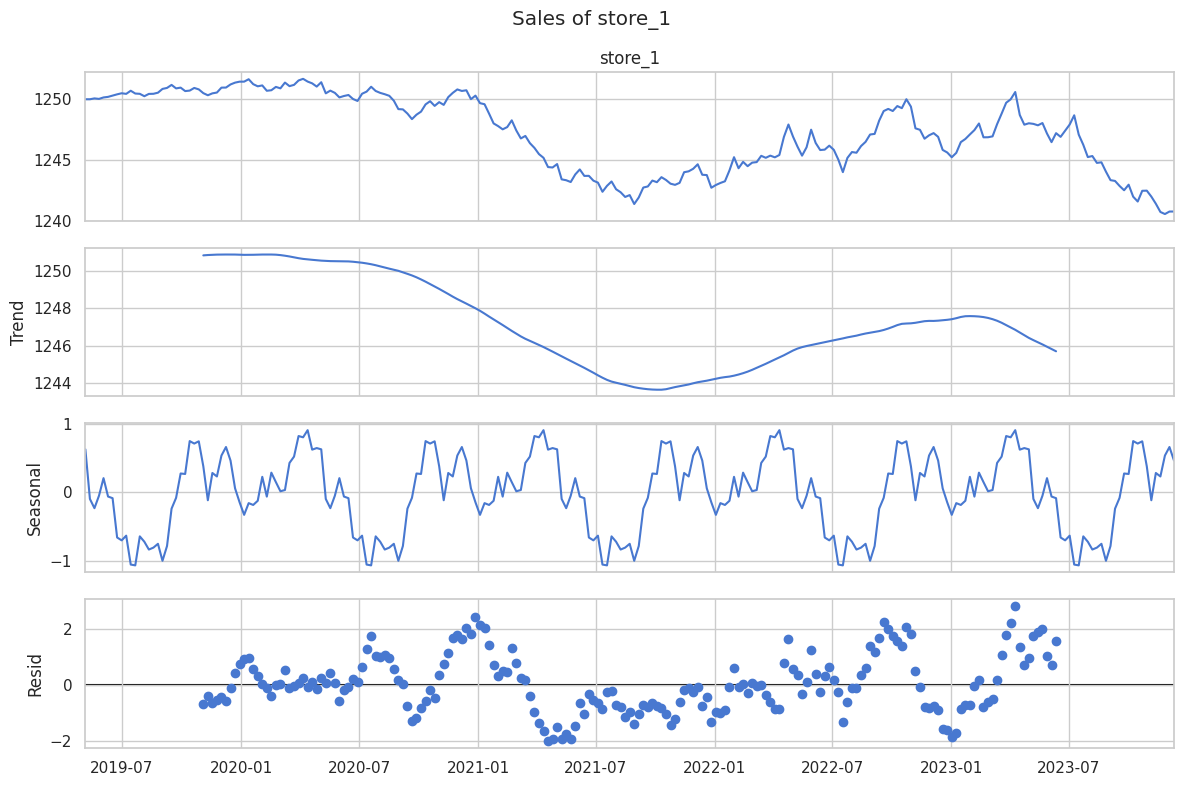

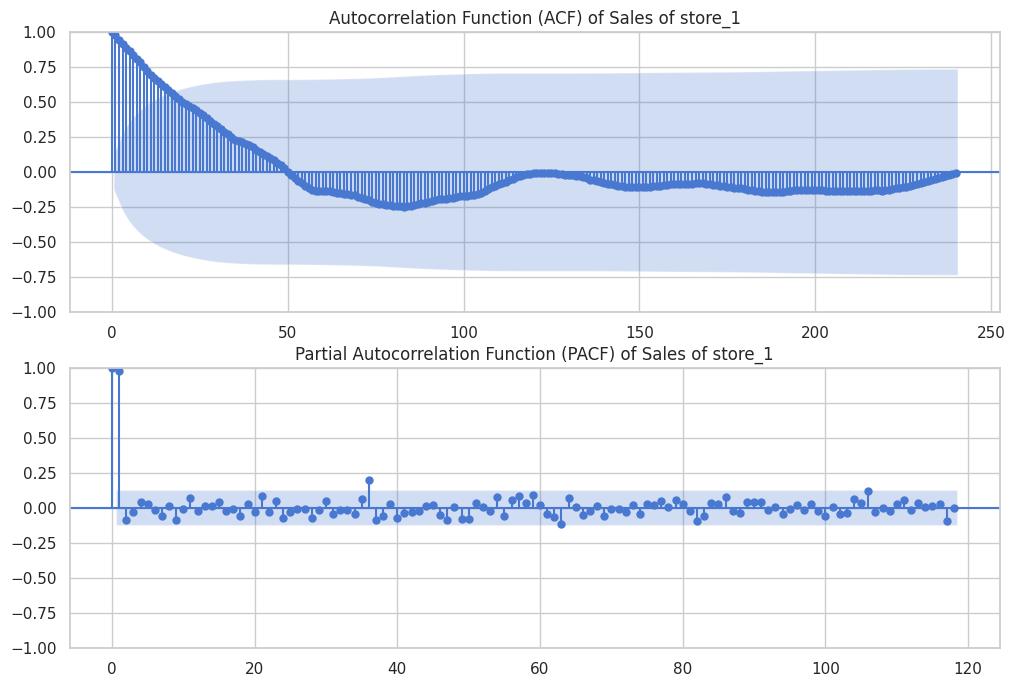

------------------------------
ADF Statistic: -0.9351045788956929
p-value: 0.7761923204452736
TS is Stationary
------------------------------


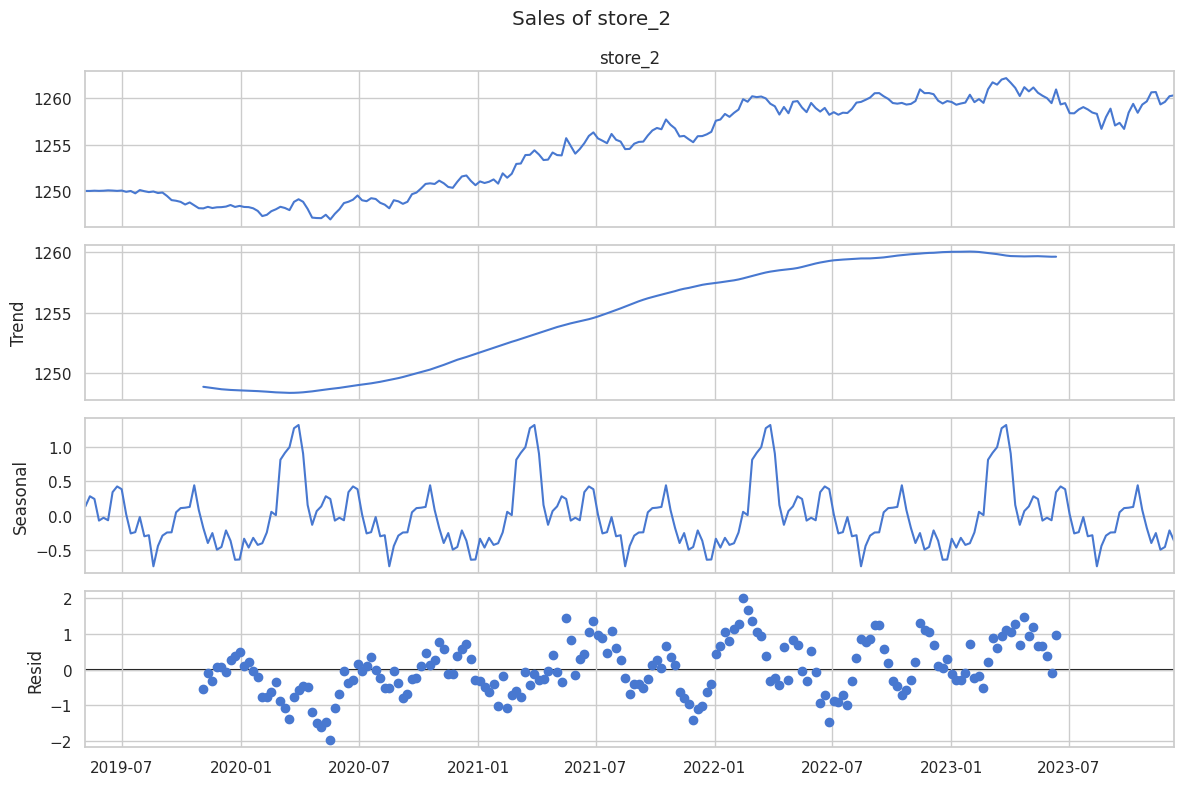

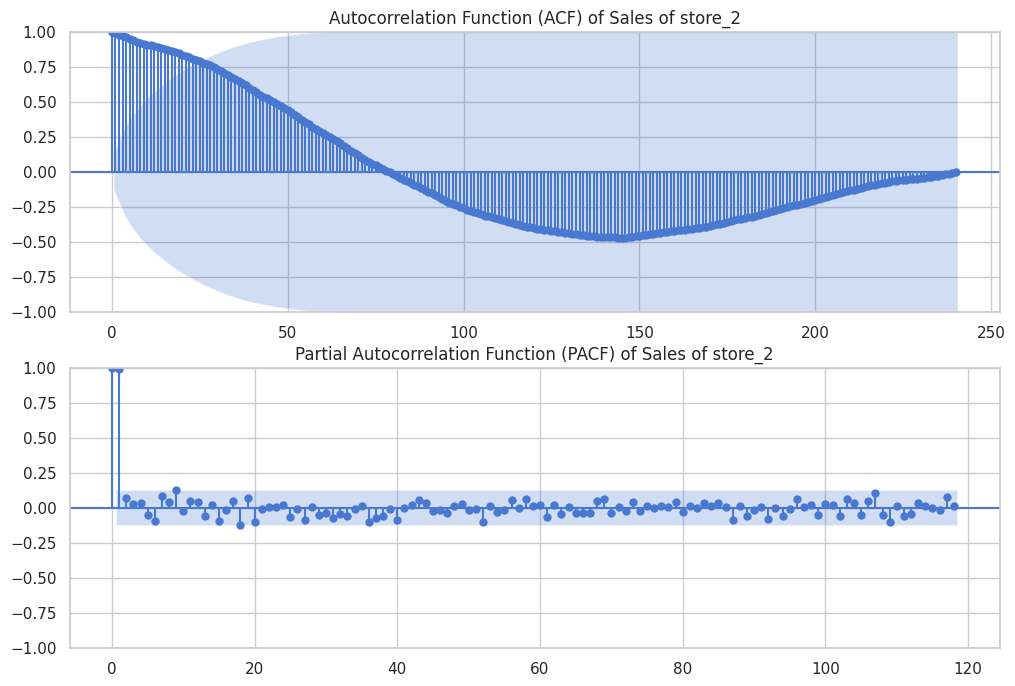

------------------------------
ADF Statistic: -0.5265771657285555
p-value: 0.8867249675793893
TS is Stationary
------------------------------


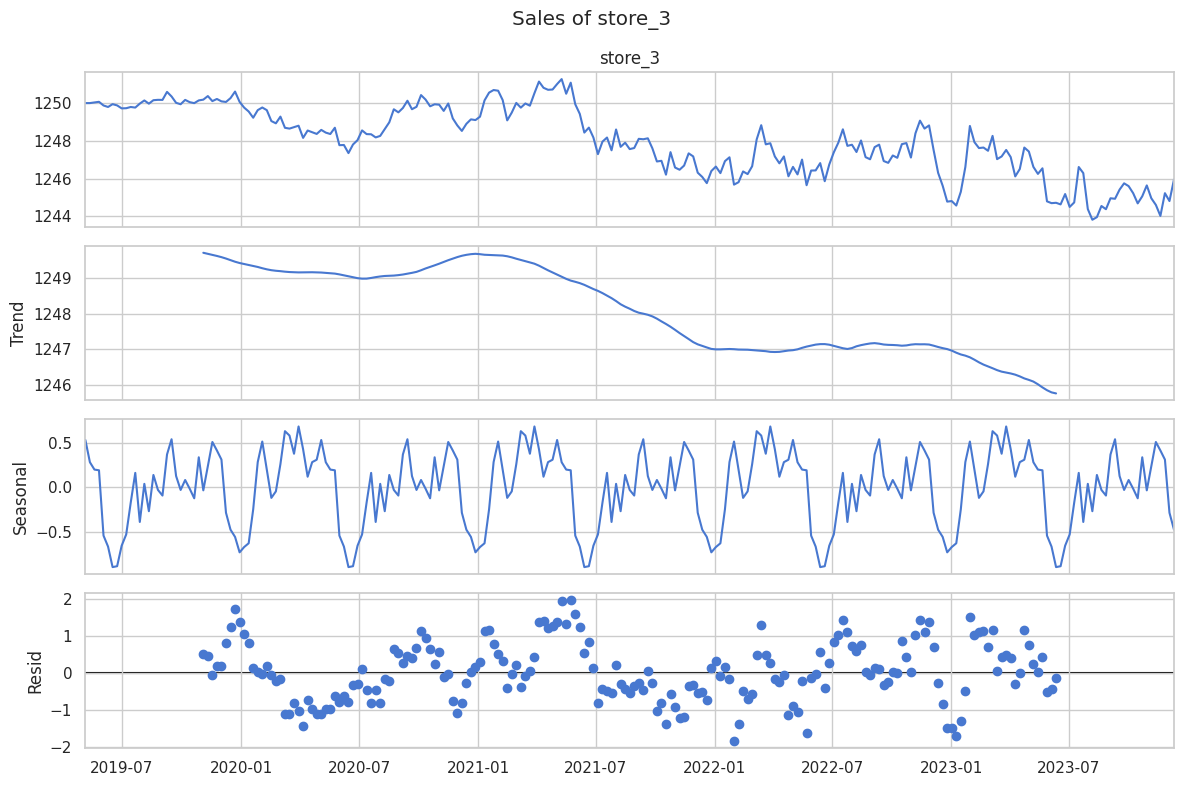

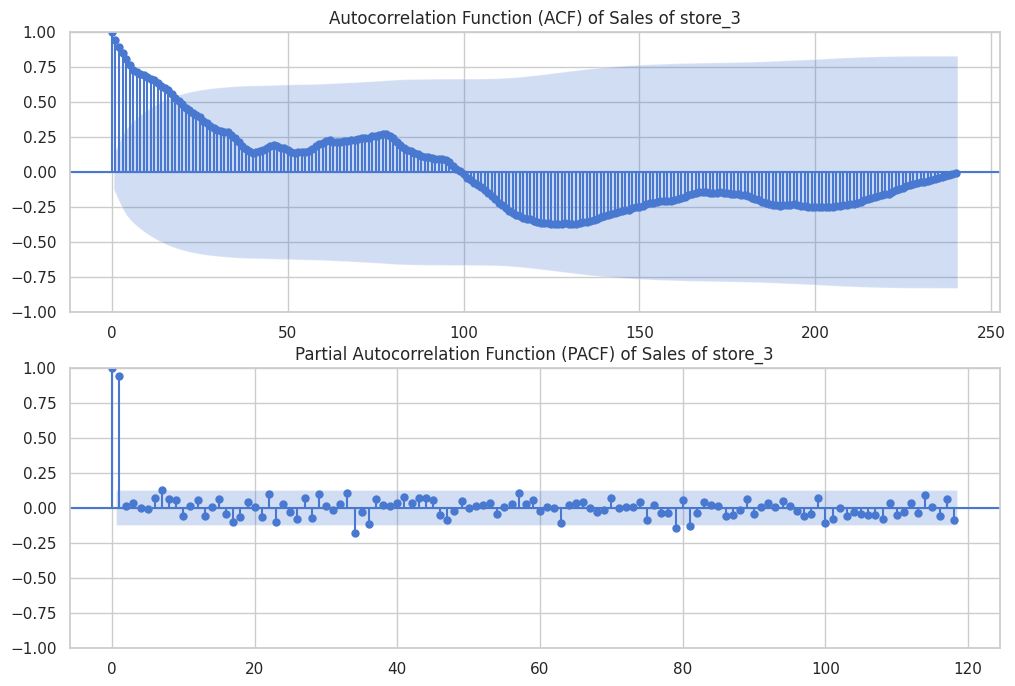

------------------------------
ADF Statistic: -2.5130260519247525
p-value: 0.1123370293099975
TS is Stationary
------------------------------


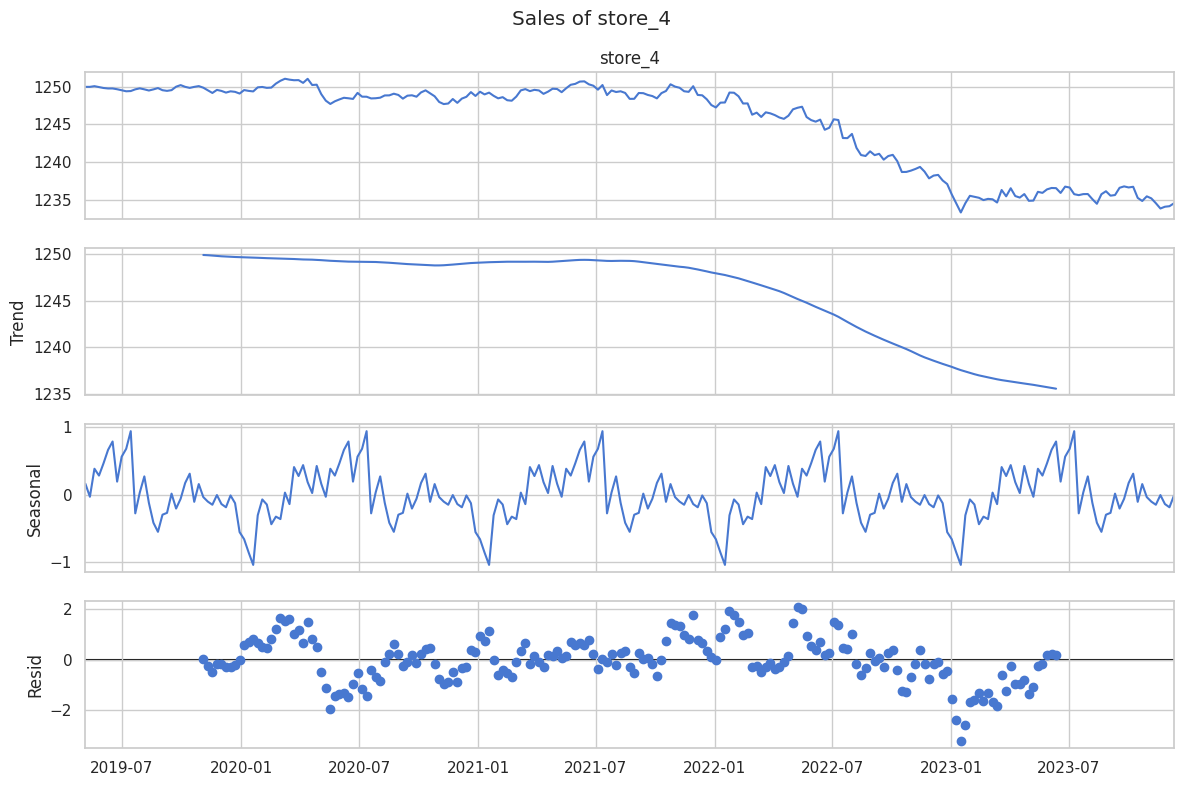

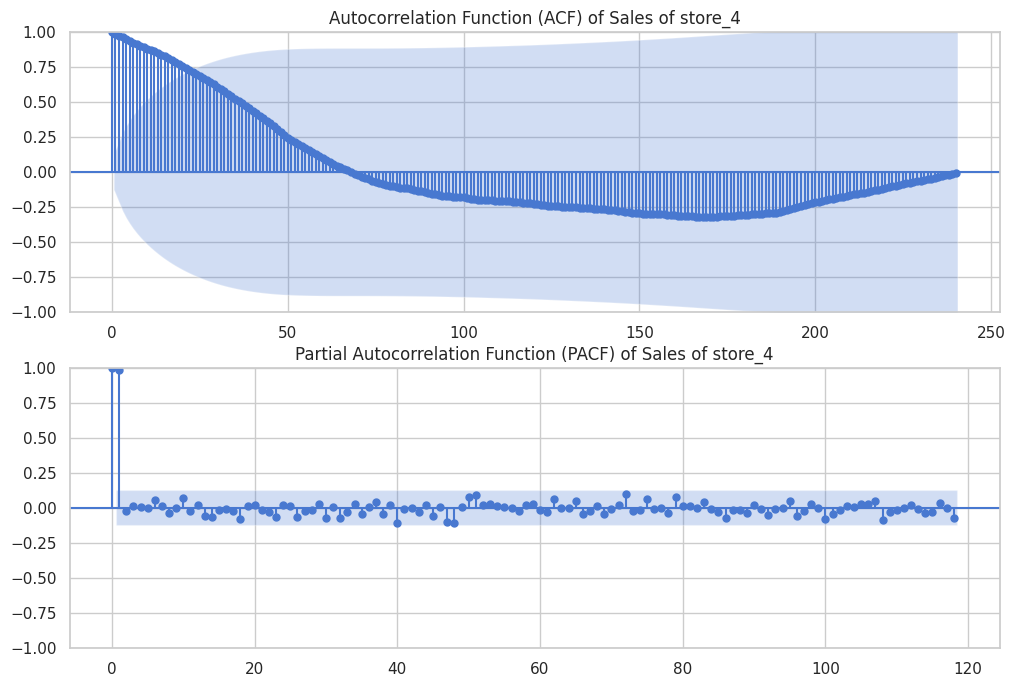

------------------------------
ADF Statistic: 0.14371362375061666
p-value: 0.9689219737413478
TS is Stationary
------------------------------


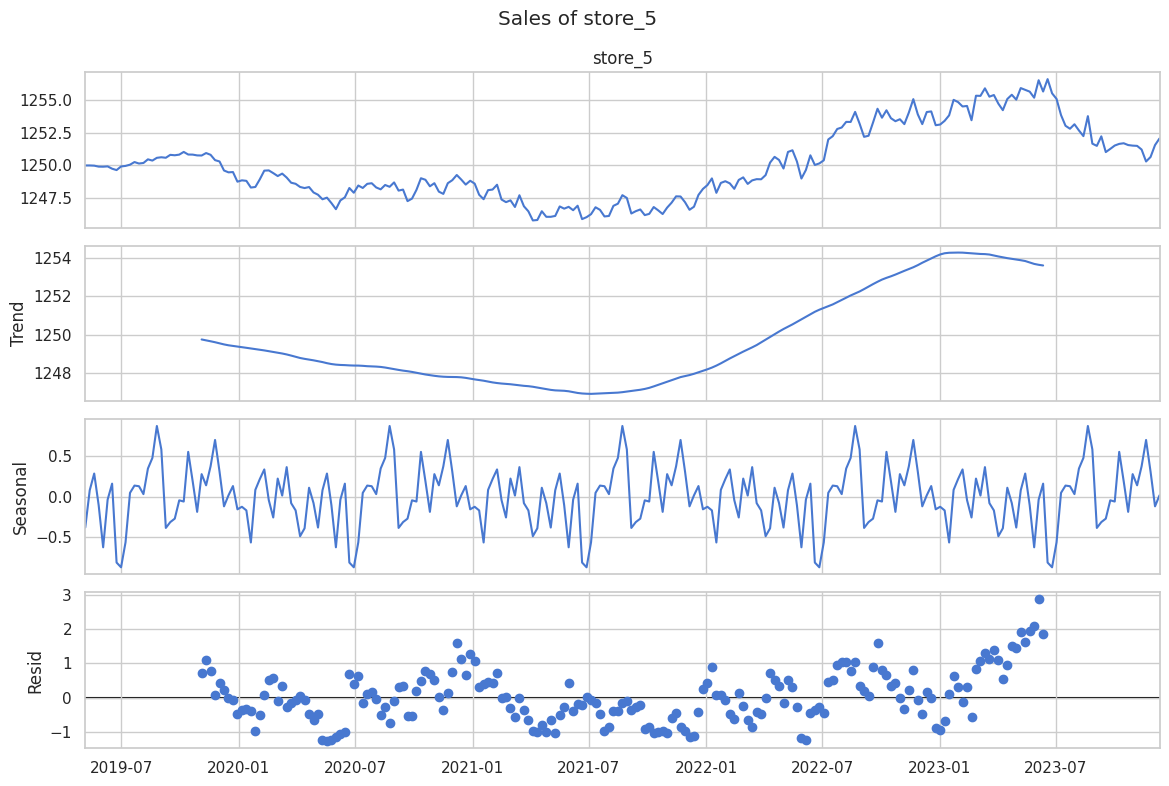

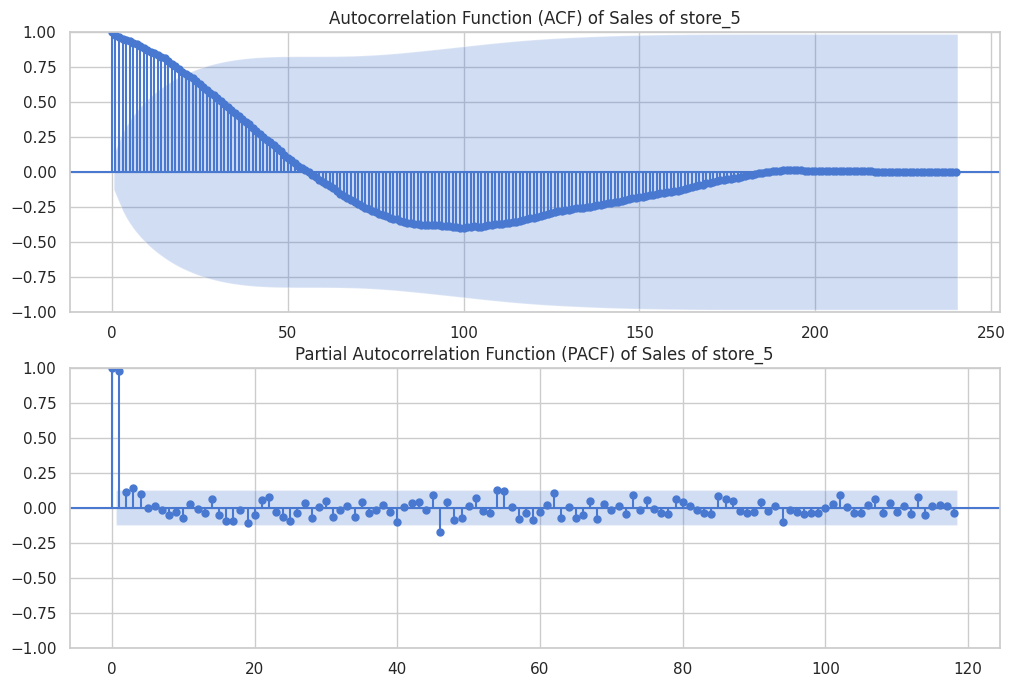

------------------------------
ADF Statistic: -1.0507273682069123
p-value: 0.7343162678496912
TS is Stationary
------------------------------


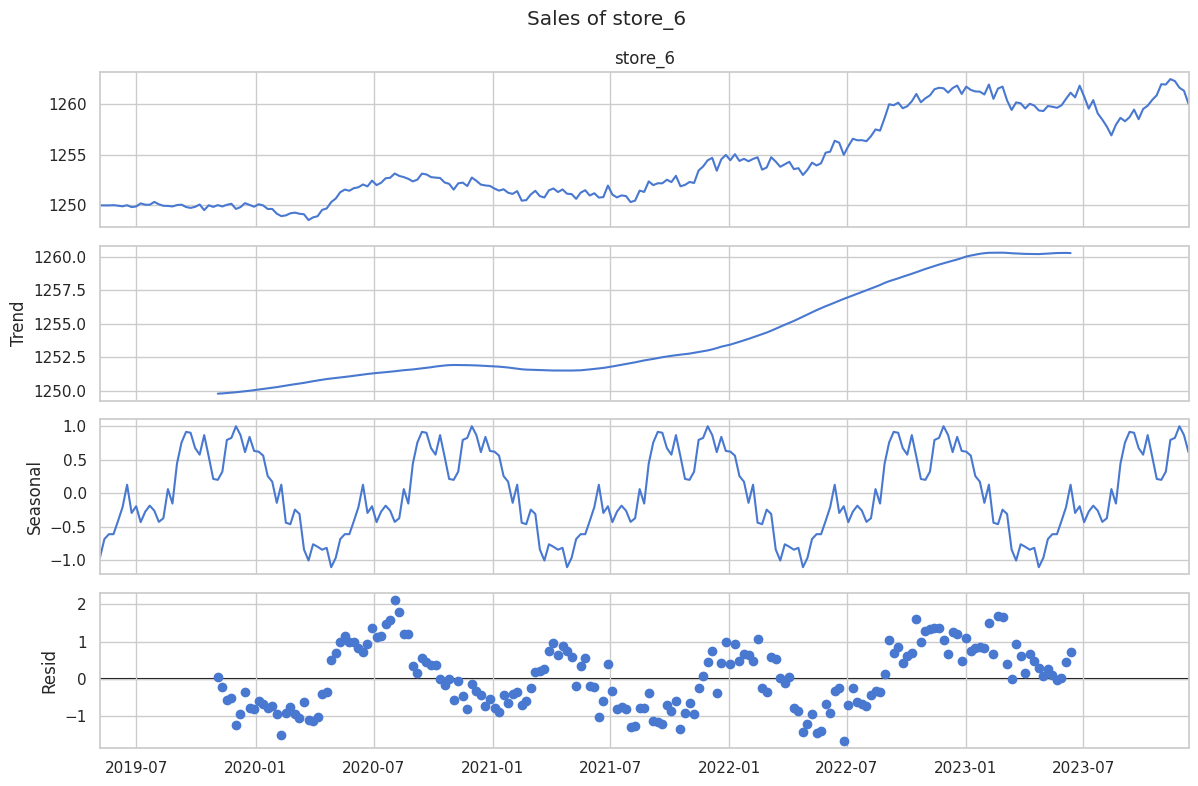

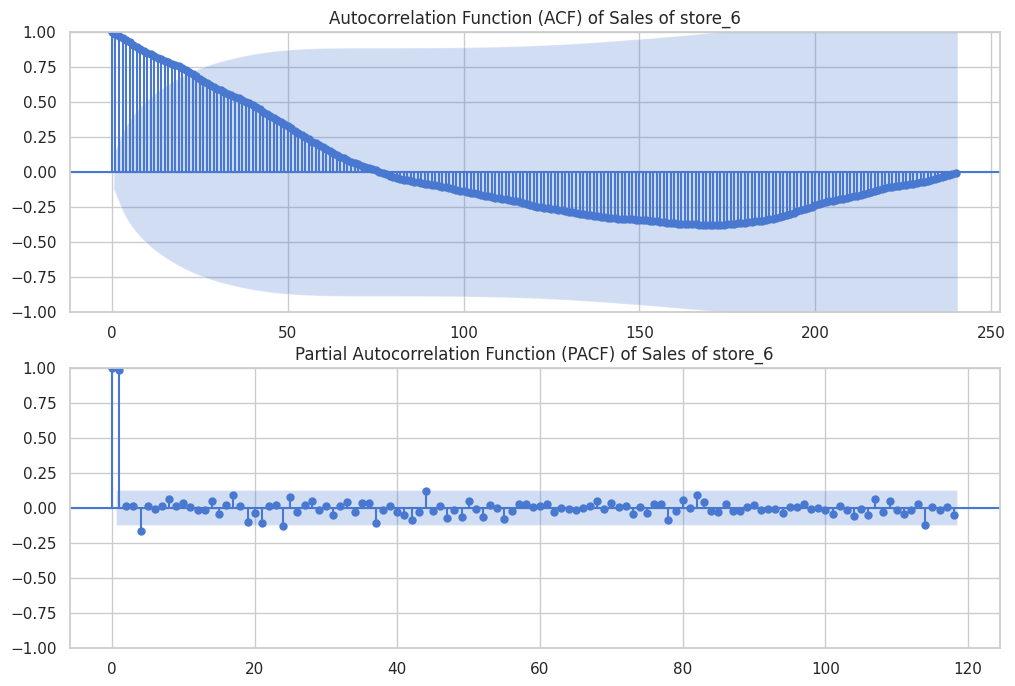

------------------------------
ADF Statistic: -0.7683025585979375
p-value: 0.8282561274657376
TS is Stationary
------------------------------


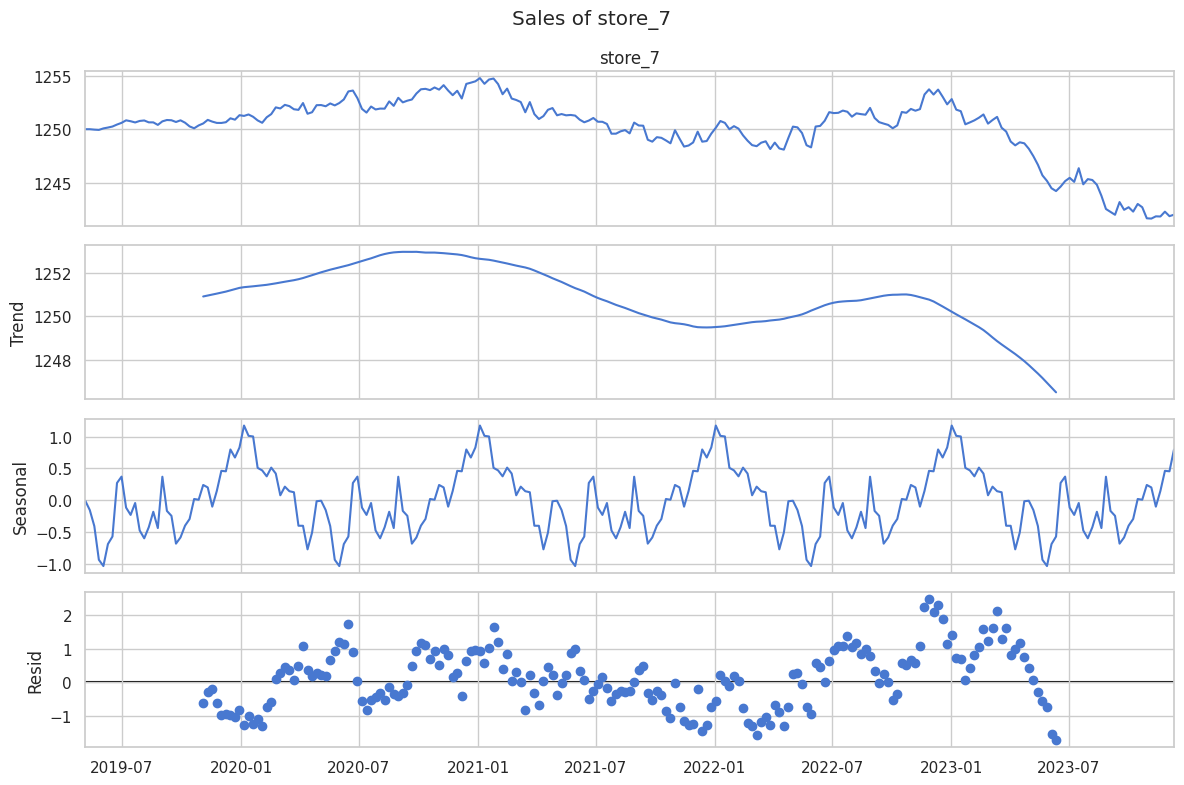

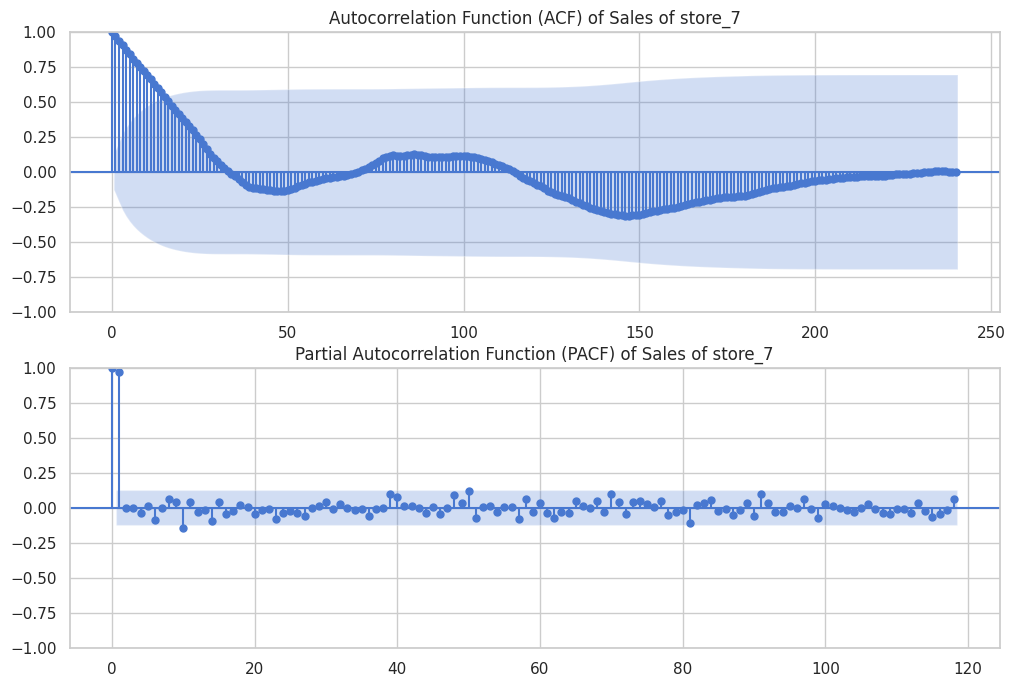

------------------------------
ADF Statistic: -0.06417629362732813
p-value: 0.9528918638994535
TS is Stationary
------------------------------


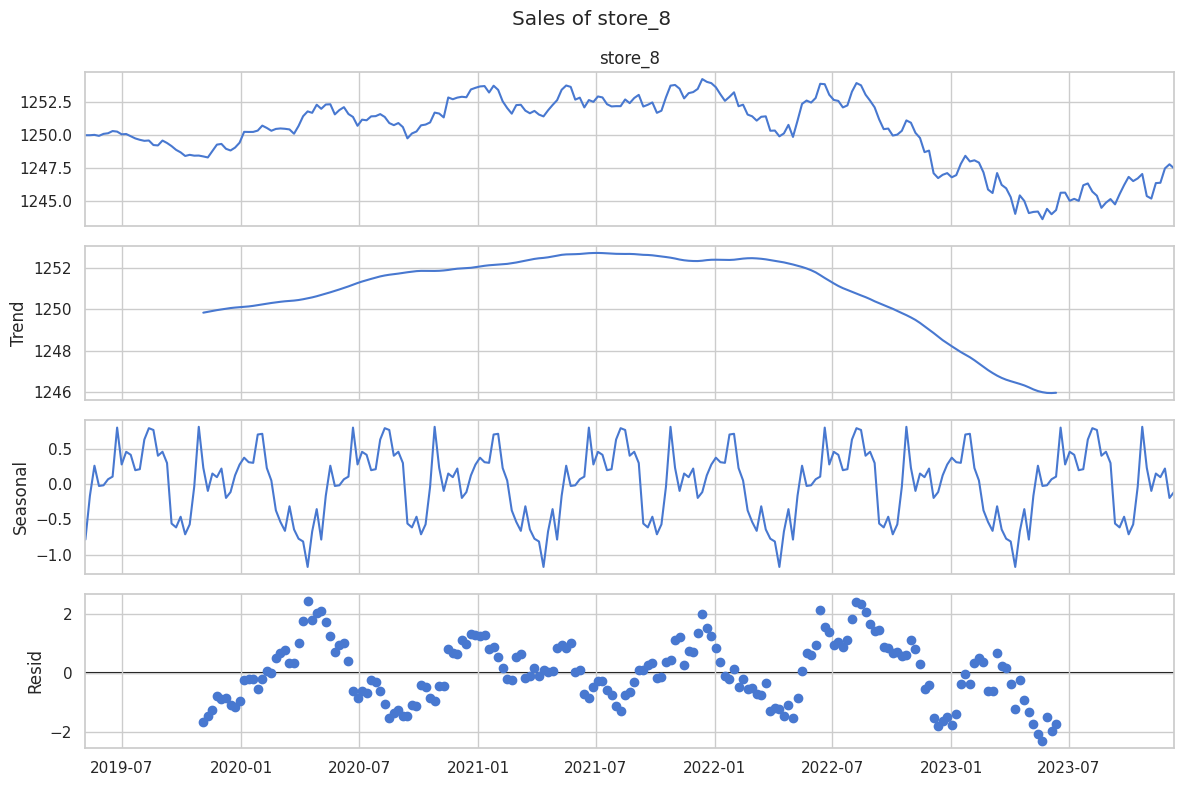

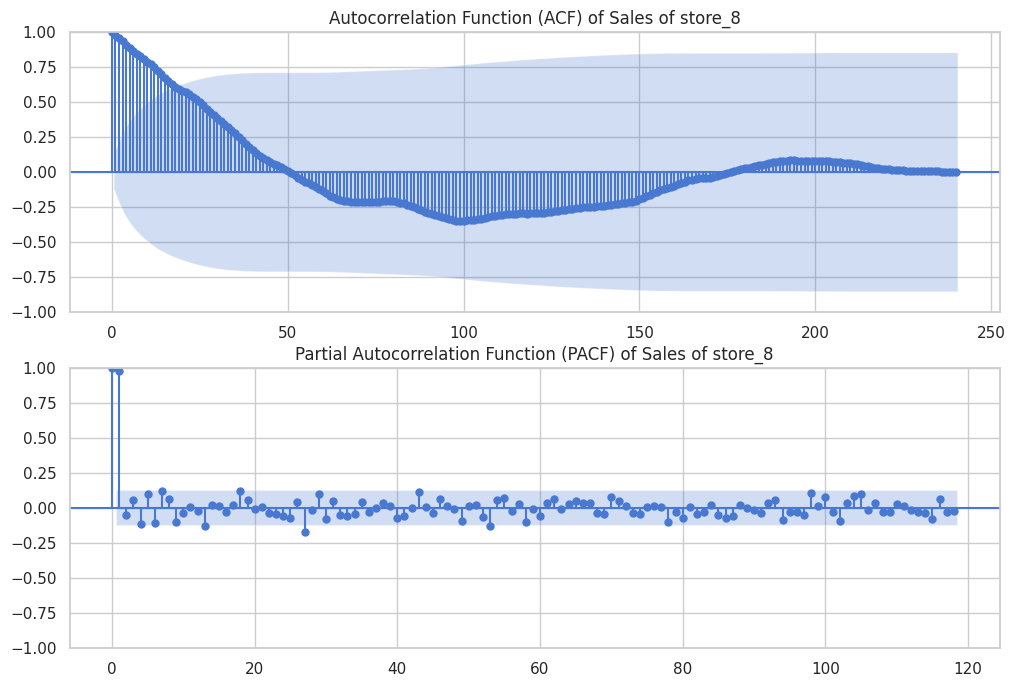

------------------------------
ADF Statistic: -1.3742852664848018
p-value: 0.5945401286665517
TS is Stationary
------------------------------


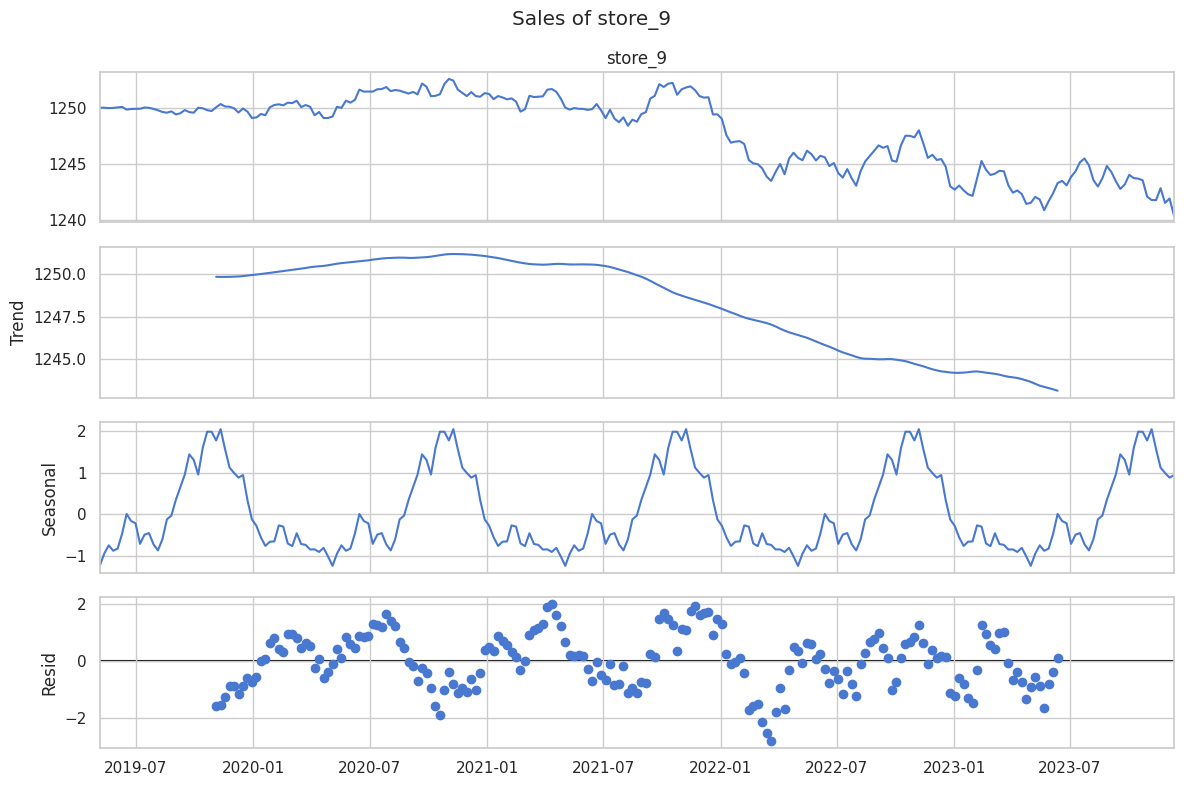

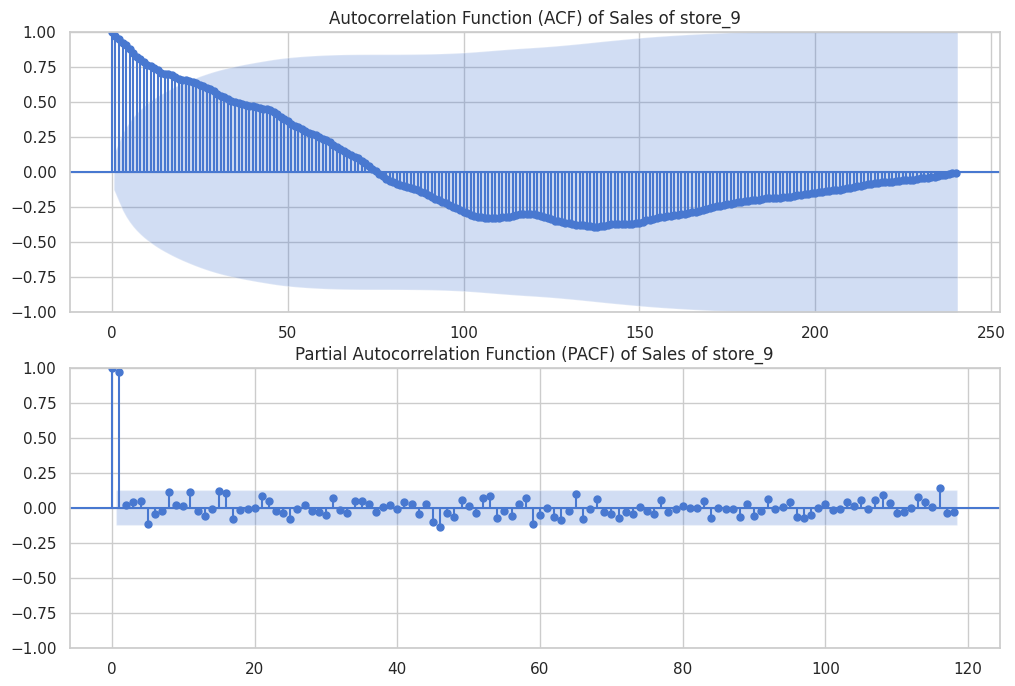

------------------------------
ADF Statistic: -0.39974084108299823
p-value: 0.9101420386318034
TS is Stationary
------------------------------


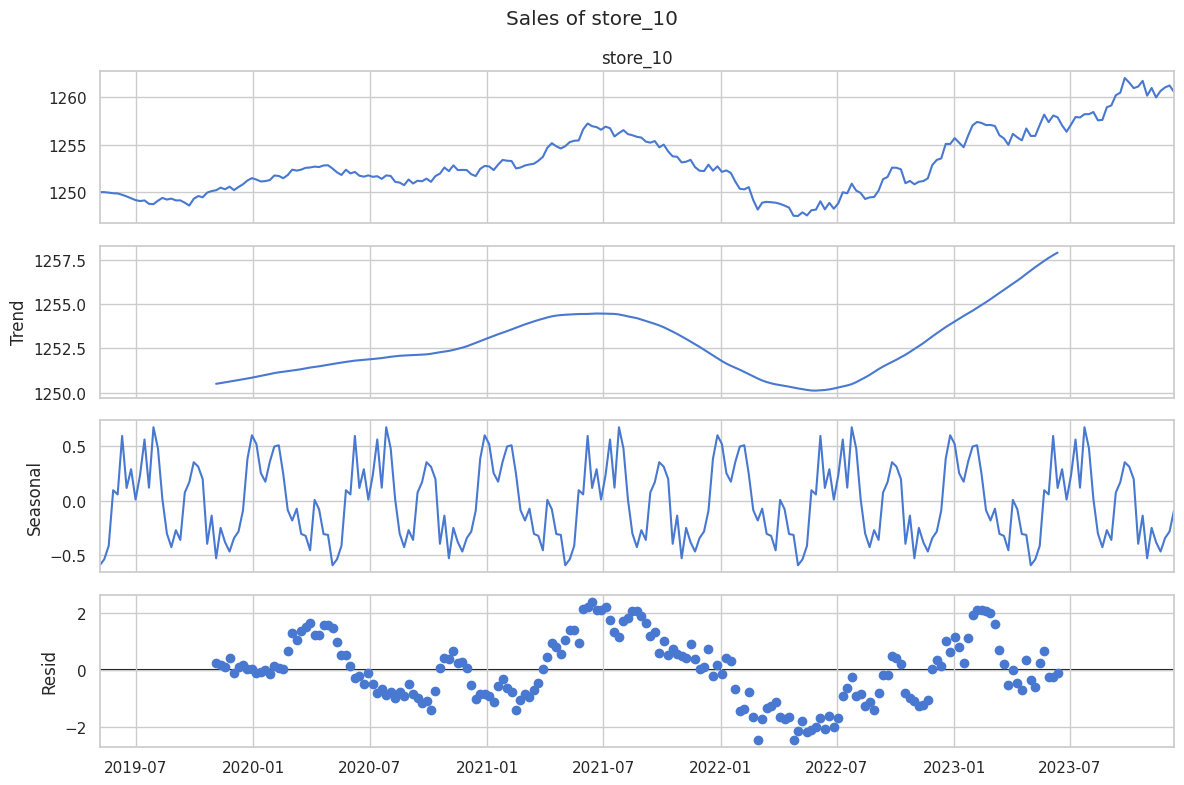

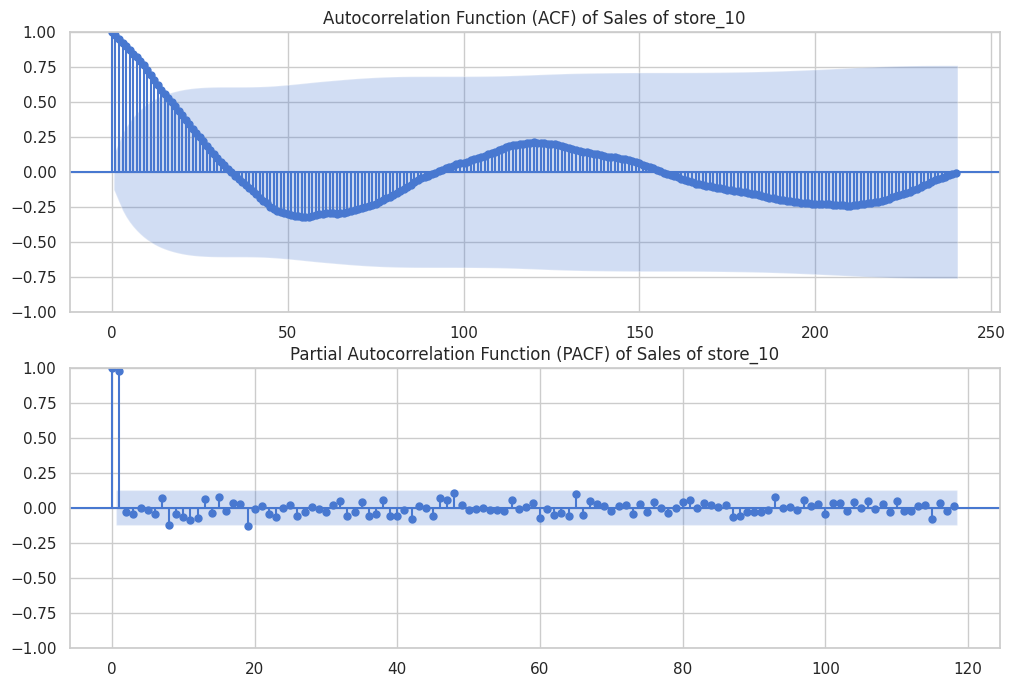

------------------------------
ADF Statistic: -0.3763530470400893
p-value: 0.9139727354028249
TS is Stationary
------------------------------


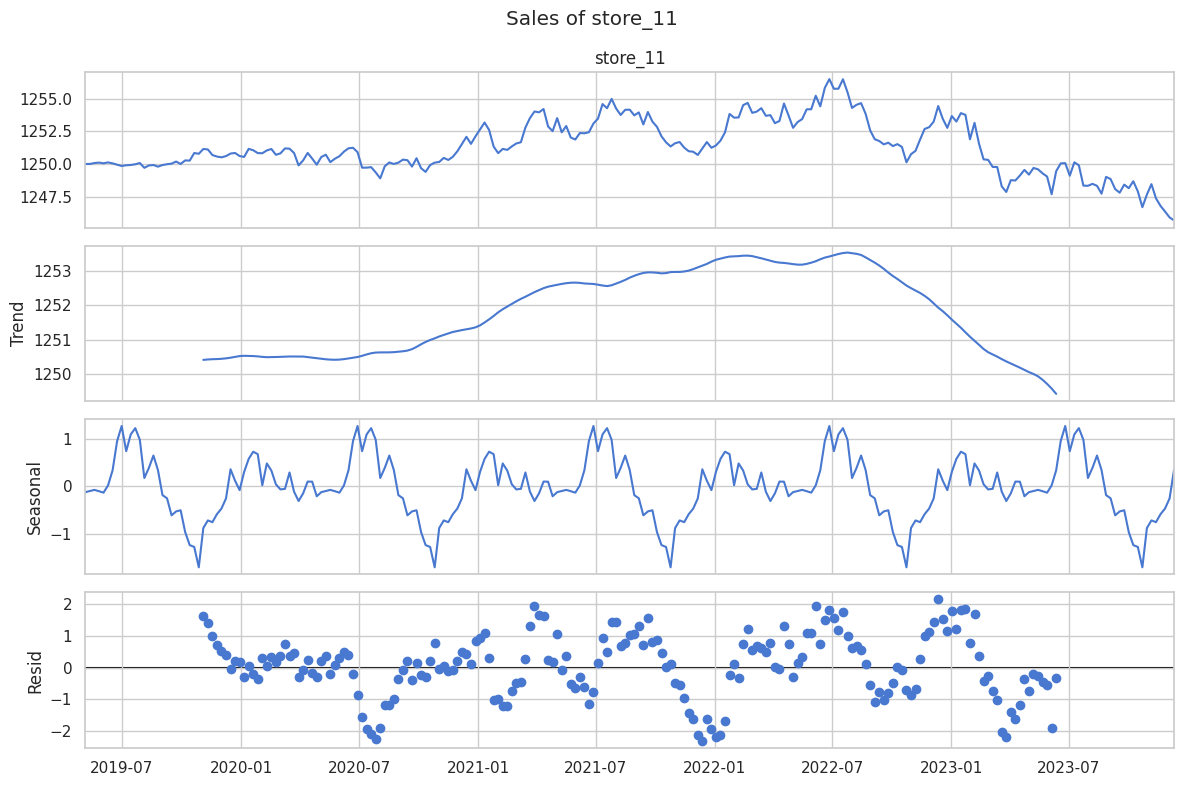

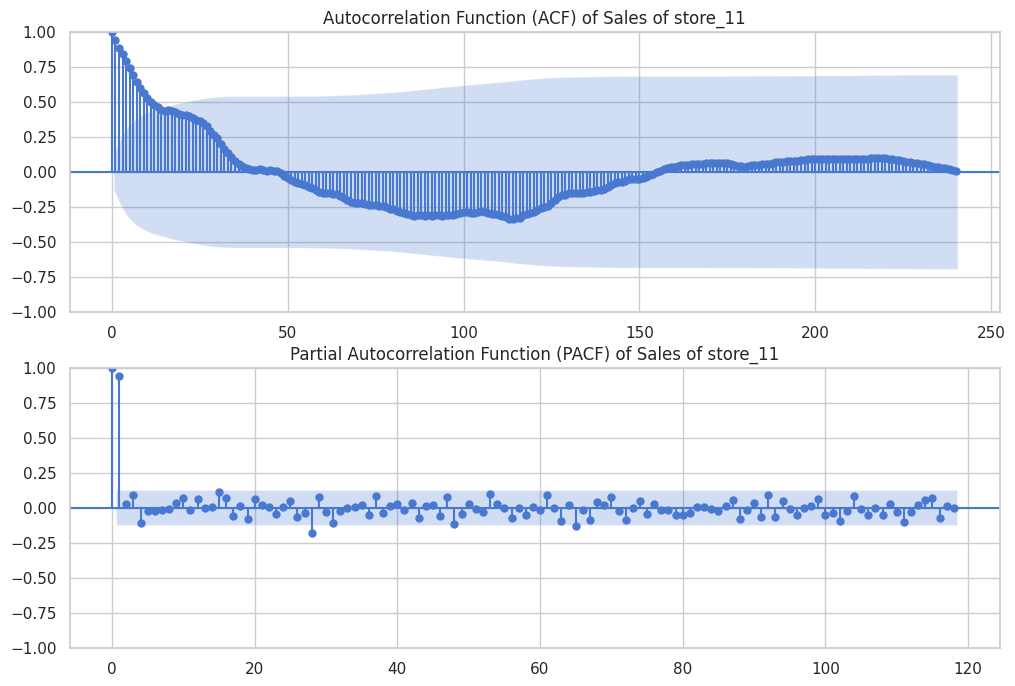

------------------------------
ADF Statistic: -1.439548518160071
p-value: 0.563176173655537
TS is Stationary
------------------------------


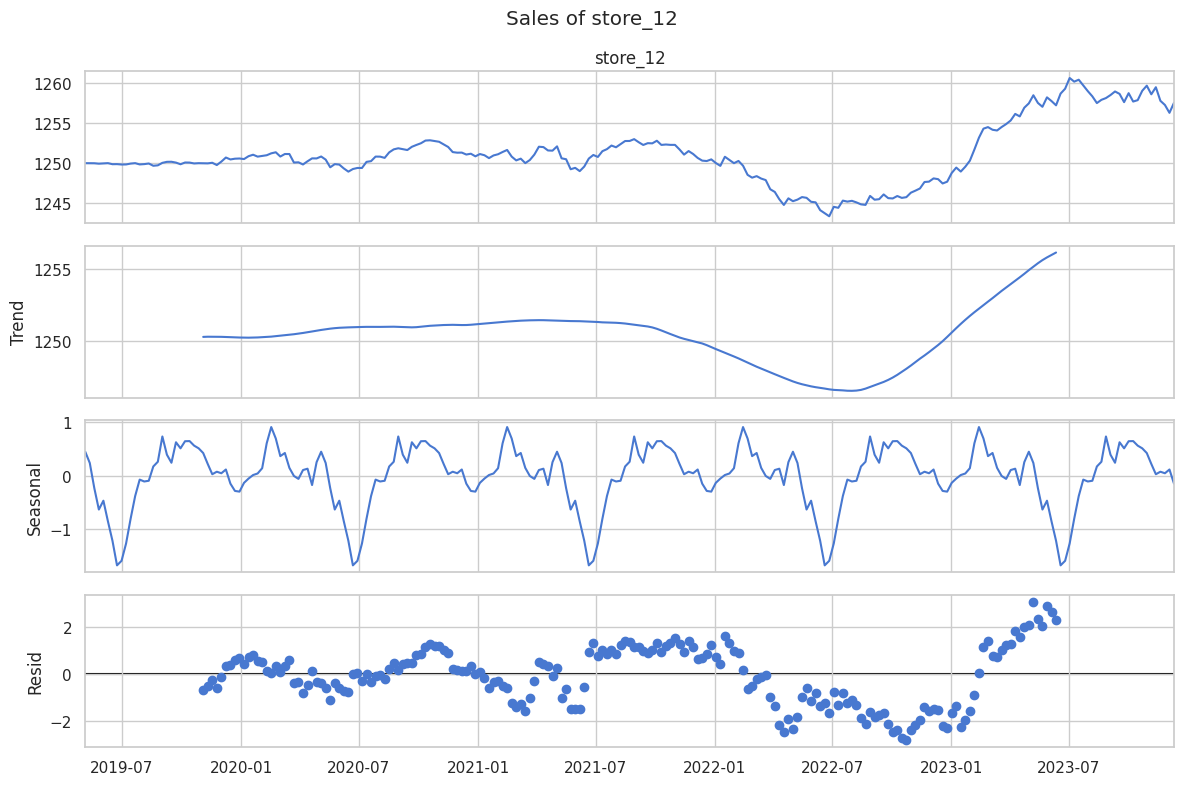

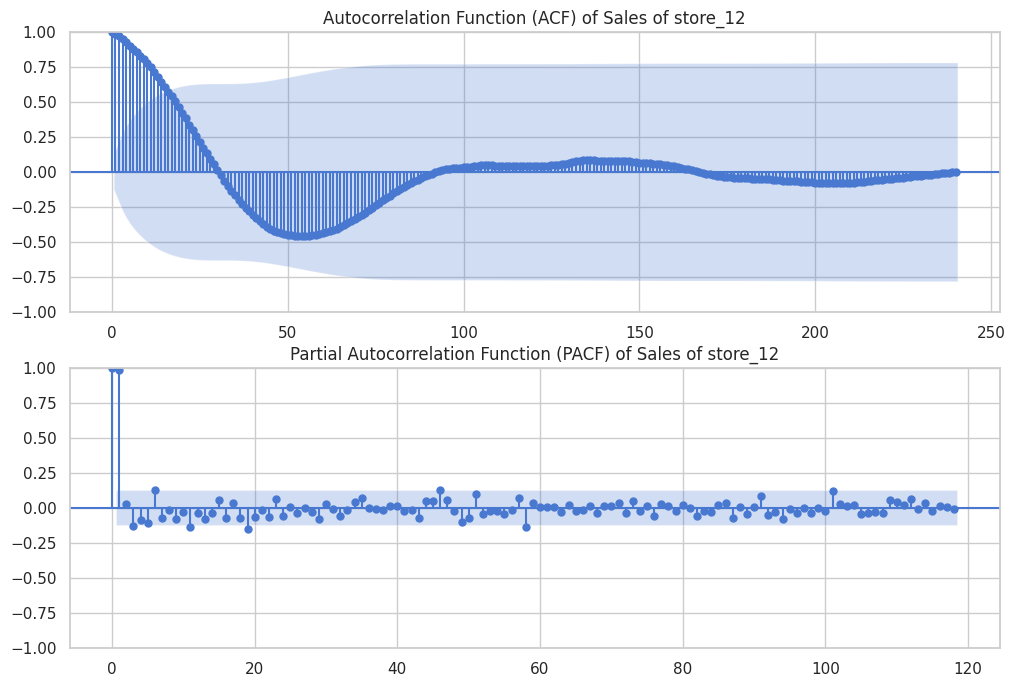

------------------------------
ADF Statistic: -1.604574378810824
p-value: 0.48129523540472685
TS is Stationary
------------------------------


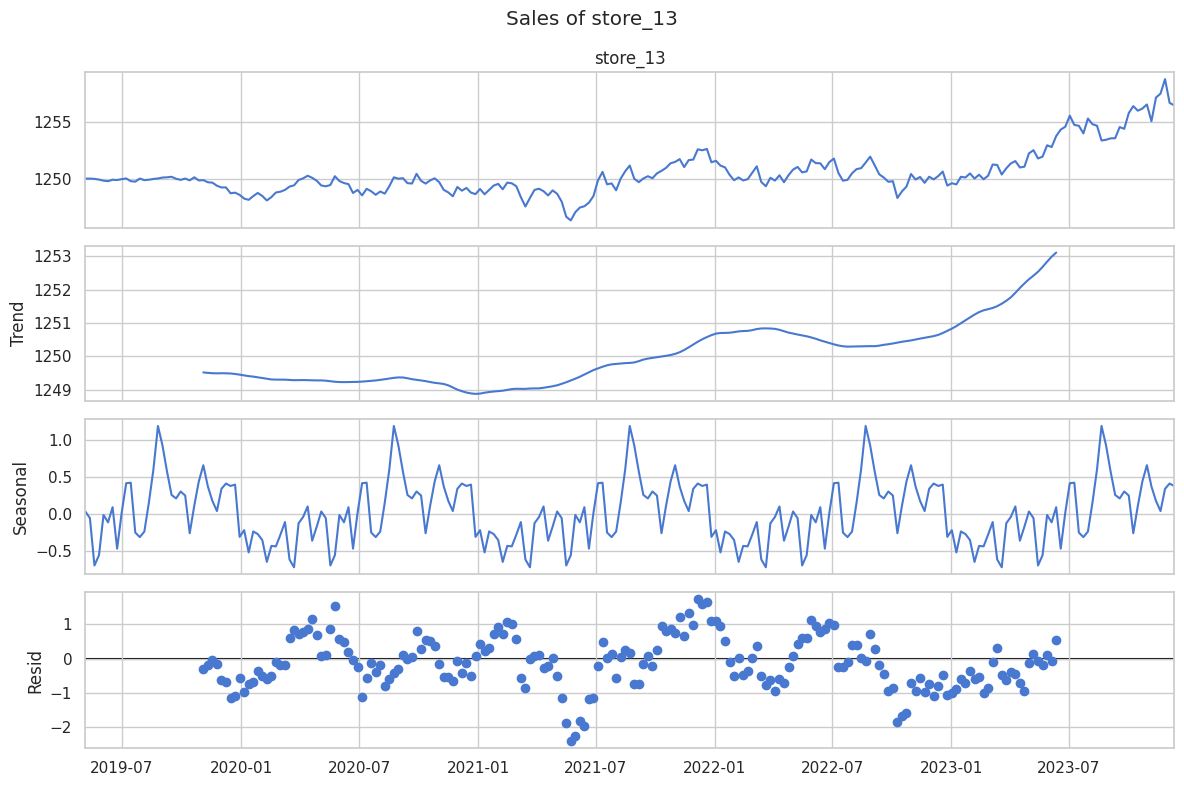

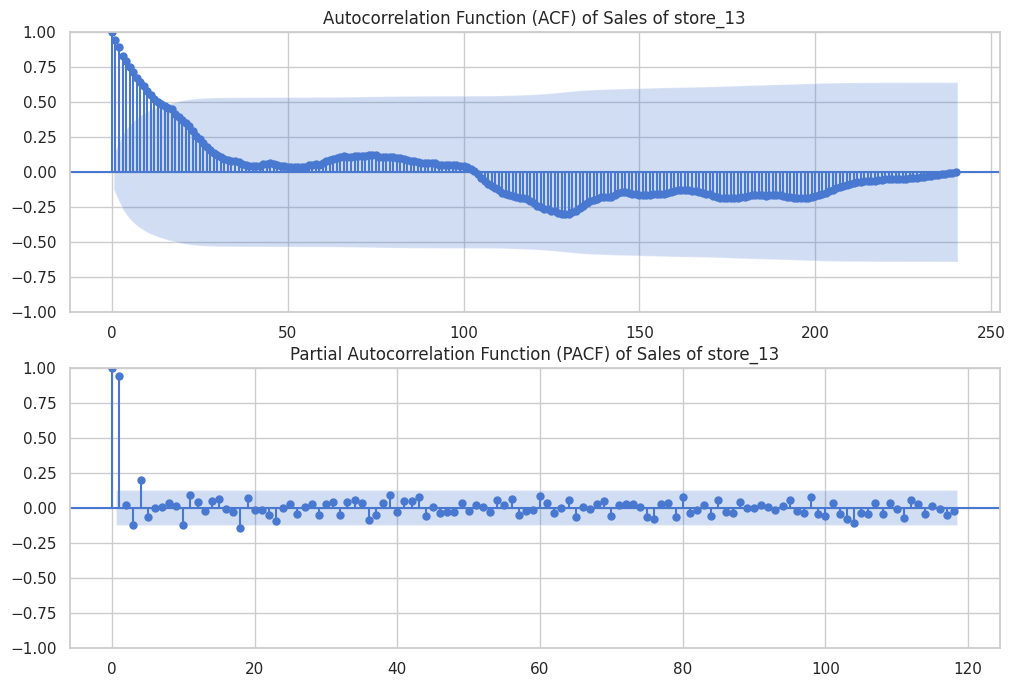

------------------------------
ADF Statistic: 0.1719317234843949
p-value: 0.970642654347436
TS is Stationary
------------------------------


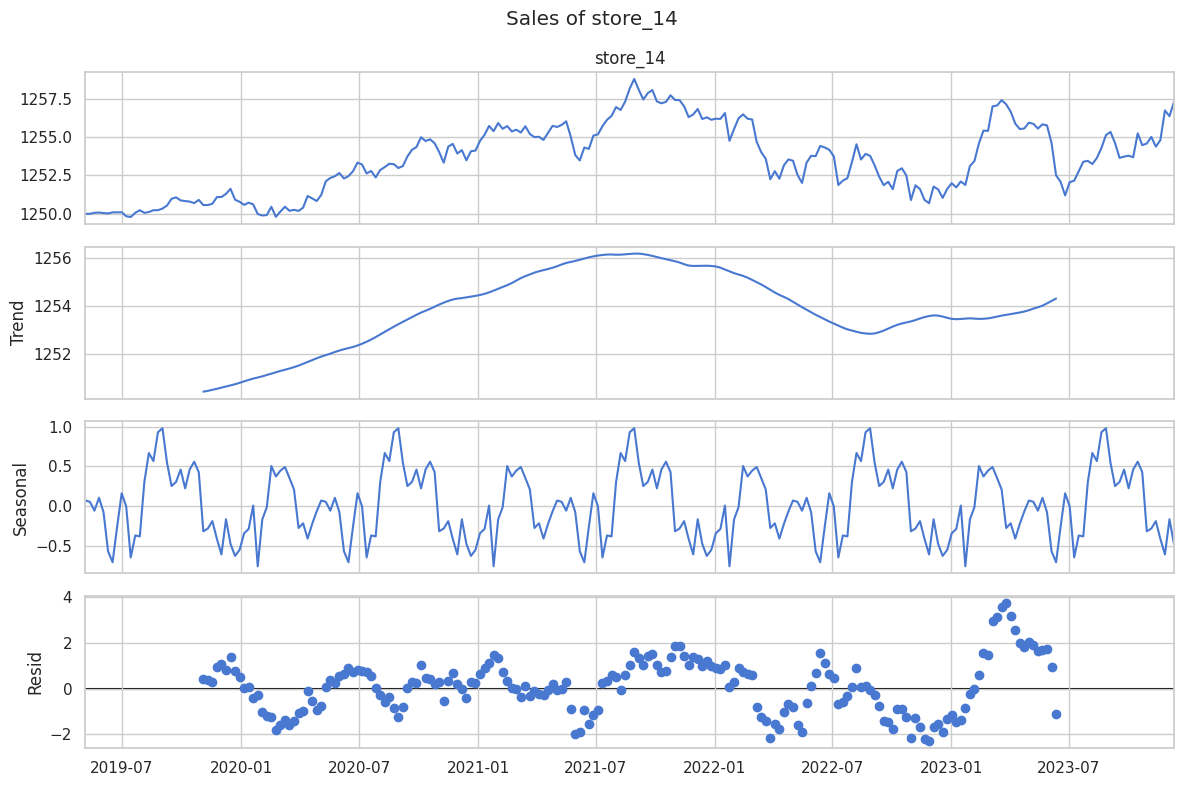

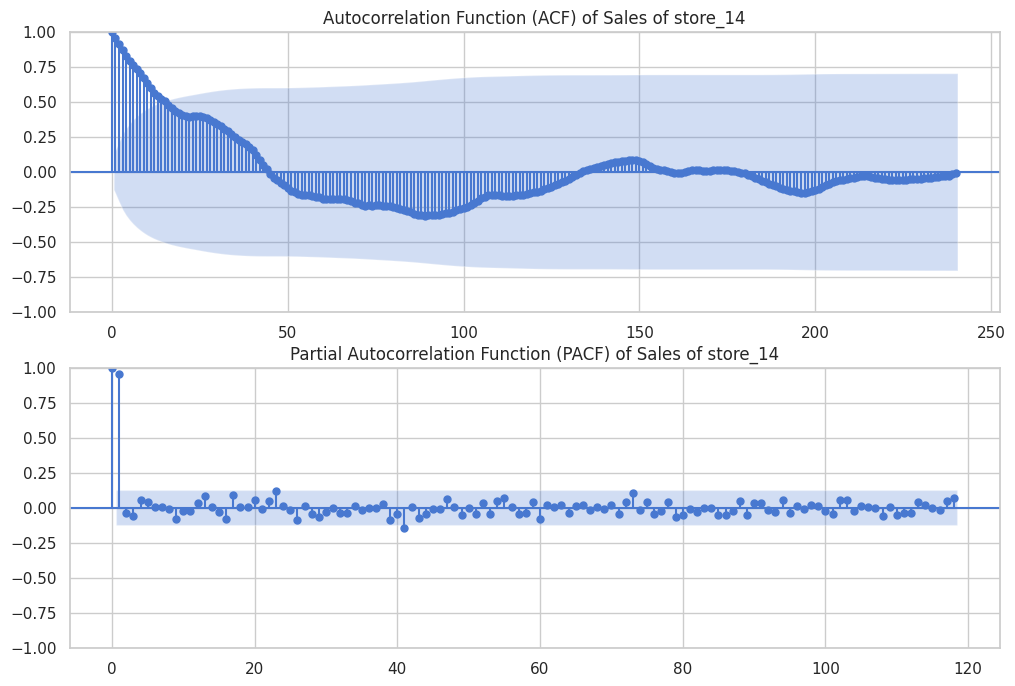

------------------------------
ADF Statistic: -1.945515583645528
p-value: 0.310961175524742
TS is Stationary
------------------------------


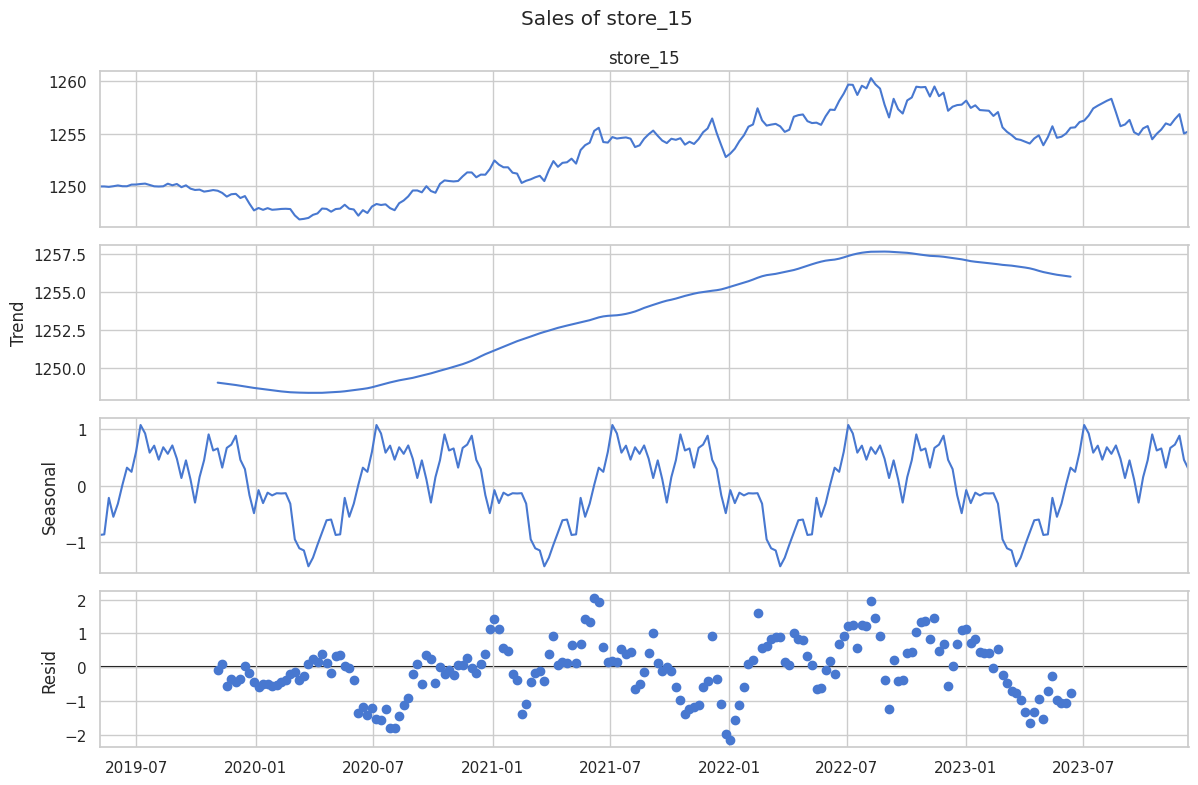

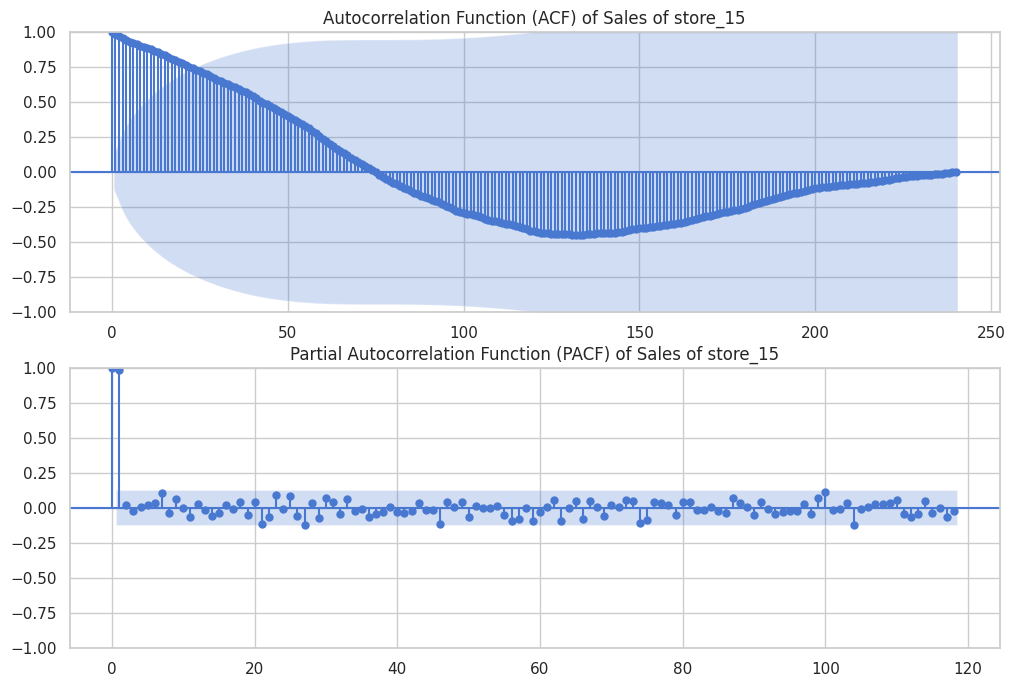

------------------------------
ADF Statistic: -1.3231865139819703
p-value: 0.6184988338371316
TS is Stationary
------------------------------


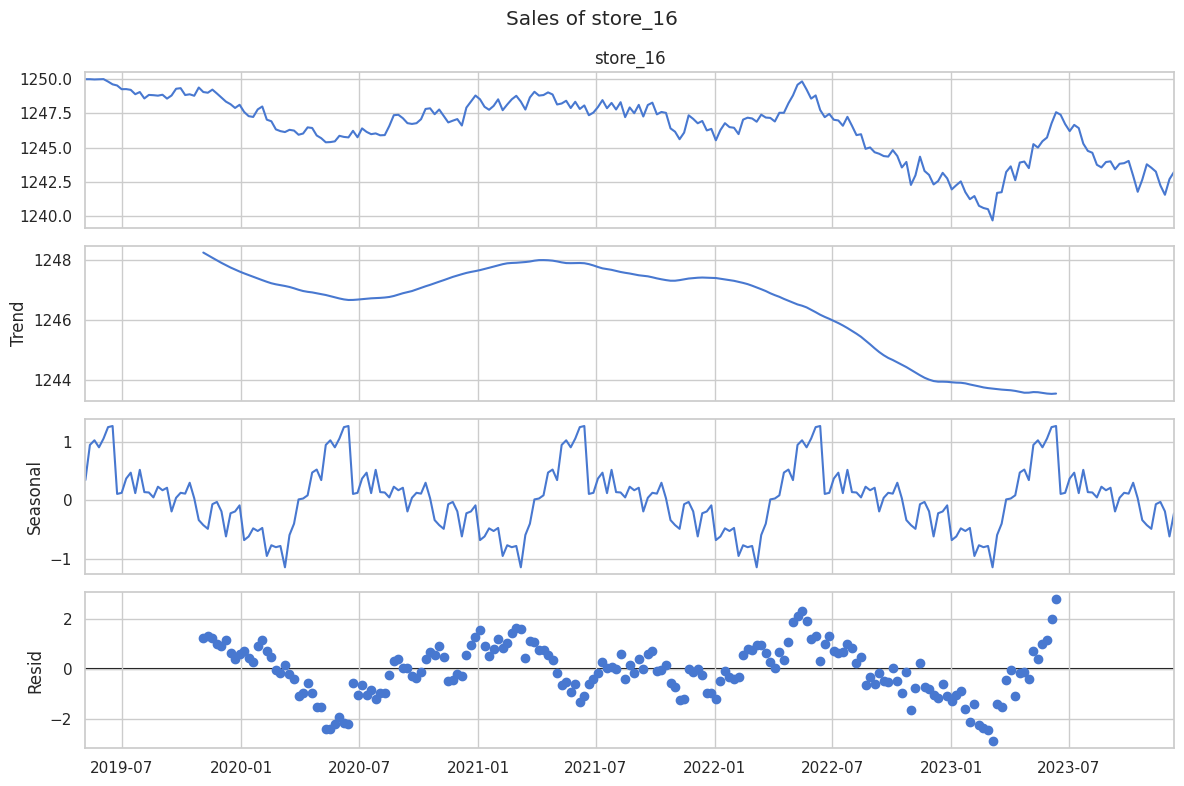

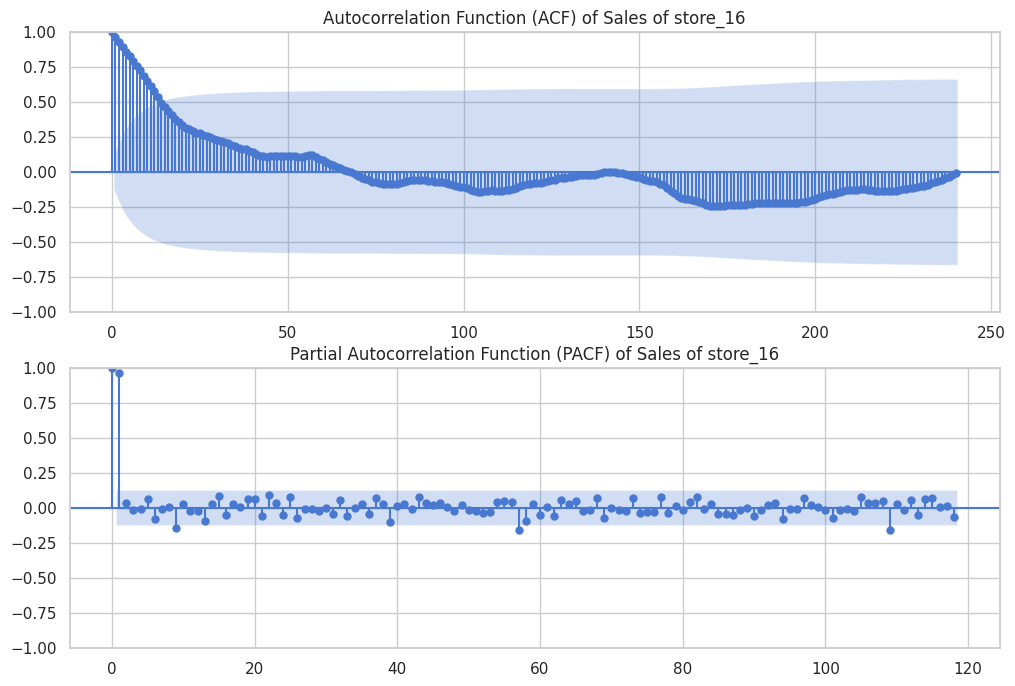

------------------------------
ADF Statistic: -1.9751155266507443
p-value: 0.29758951195940975
TS is Stationary
------------------------------


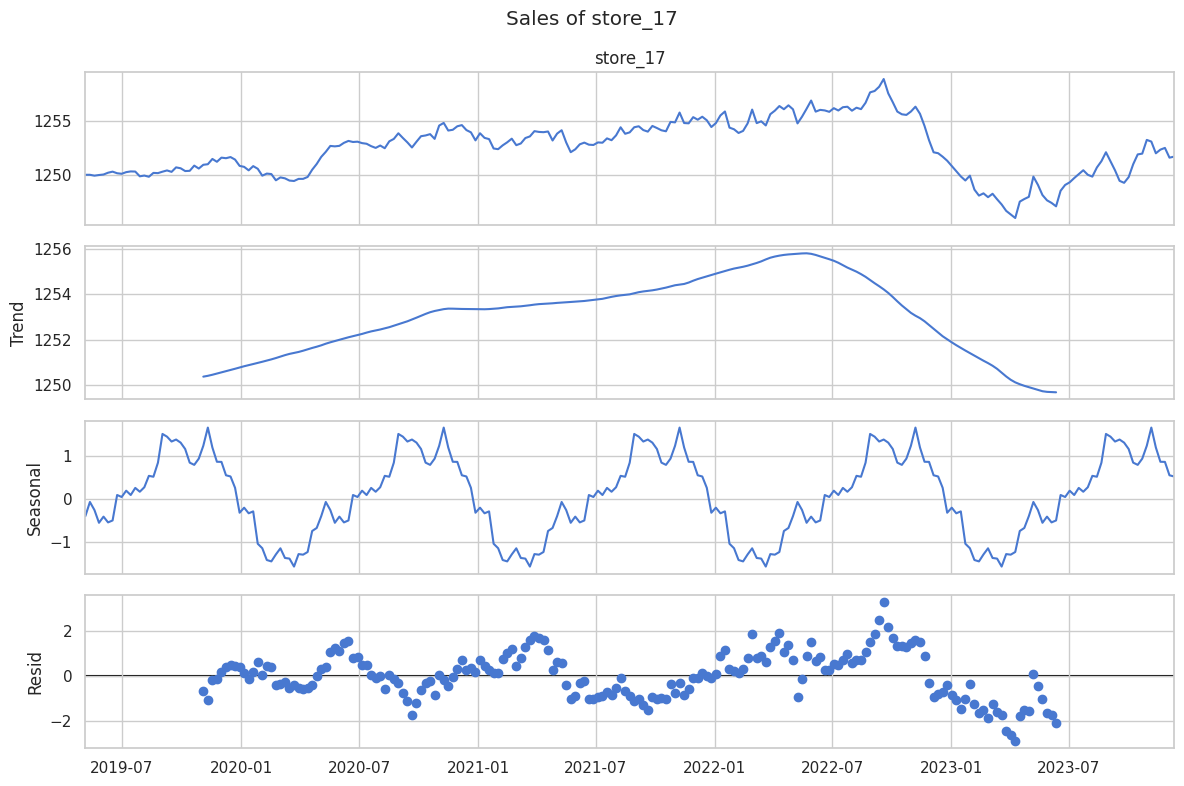

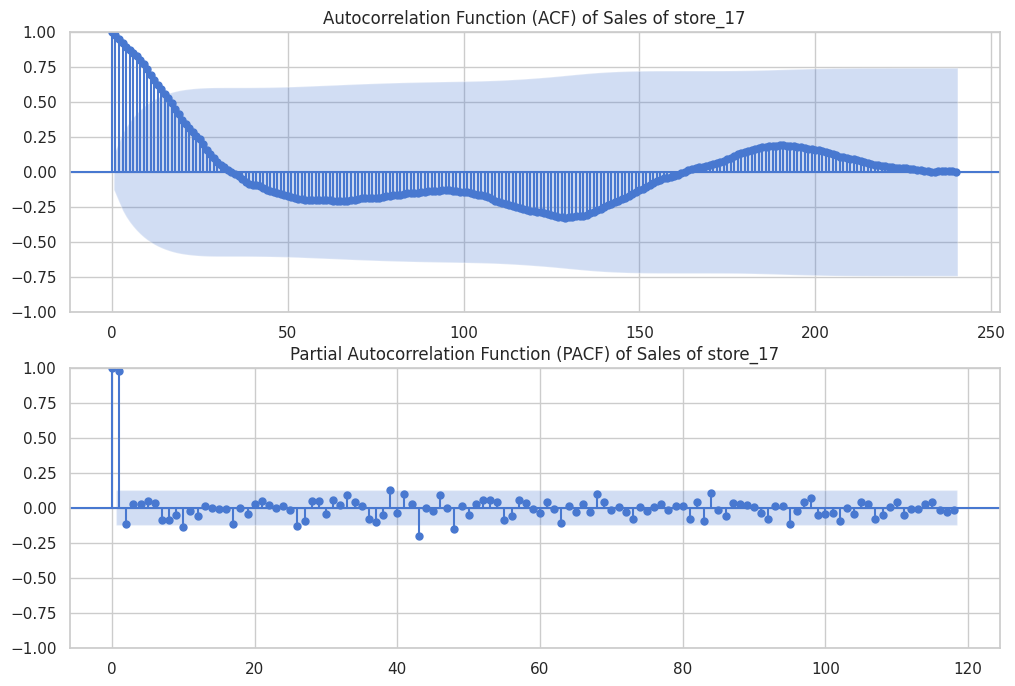

------------------------------
ADF Statistic: -1.9711487760005584
p-value: 0.2993648345123029
TS is Stationary
------------------------------


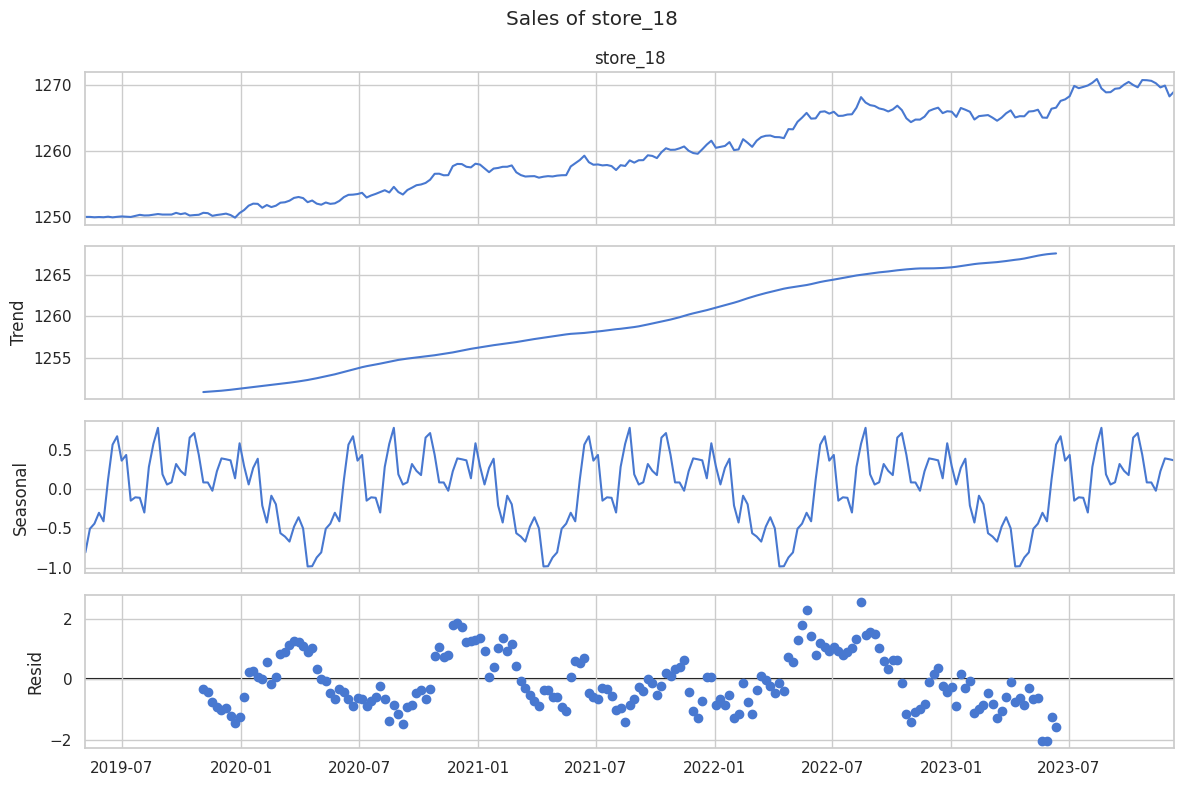

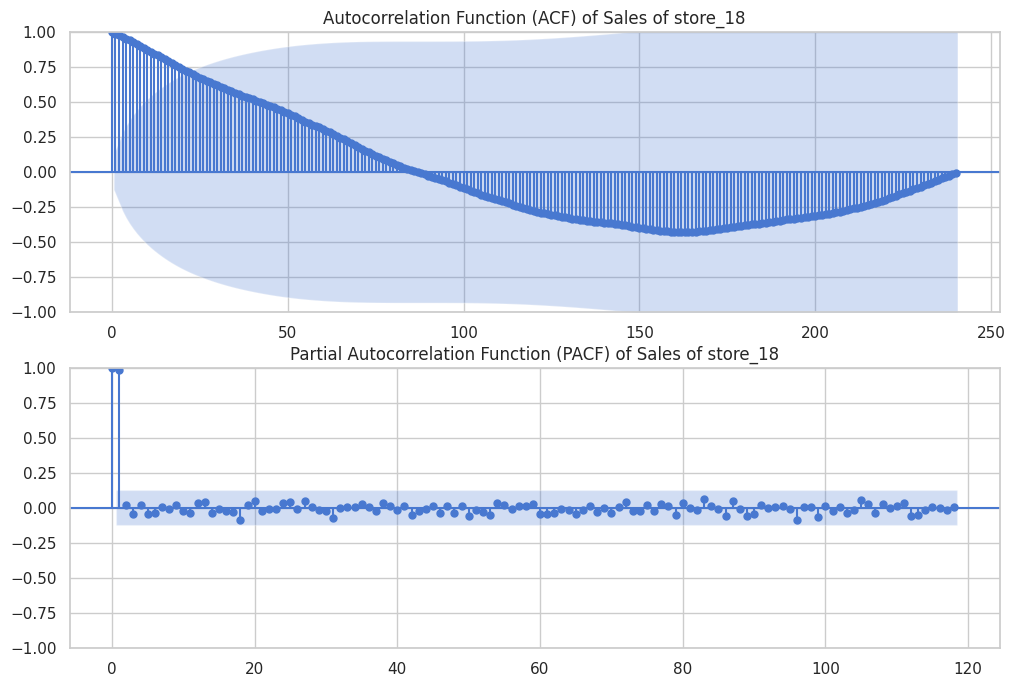

------------------------------
ADF Statistic: -0.5980462754122092
p-value: 0.8714228777421704
TS is Stationary
------------------------------


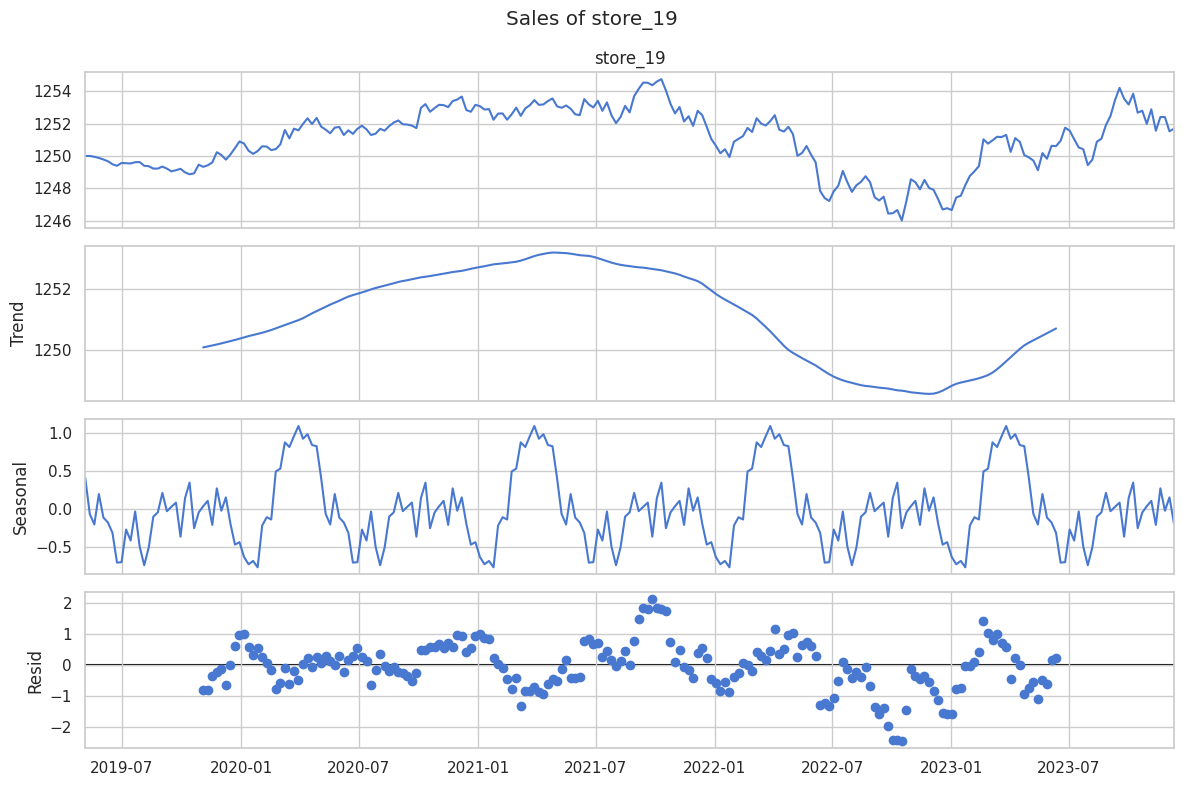

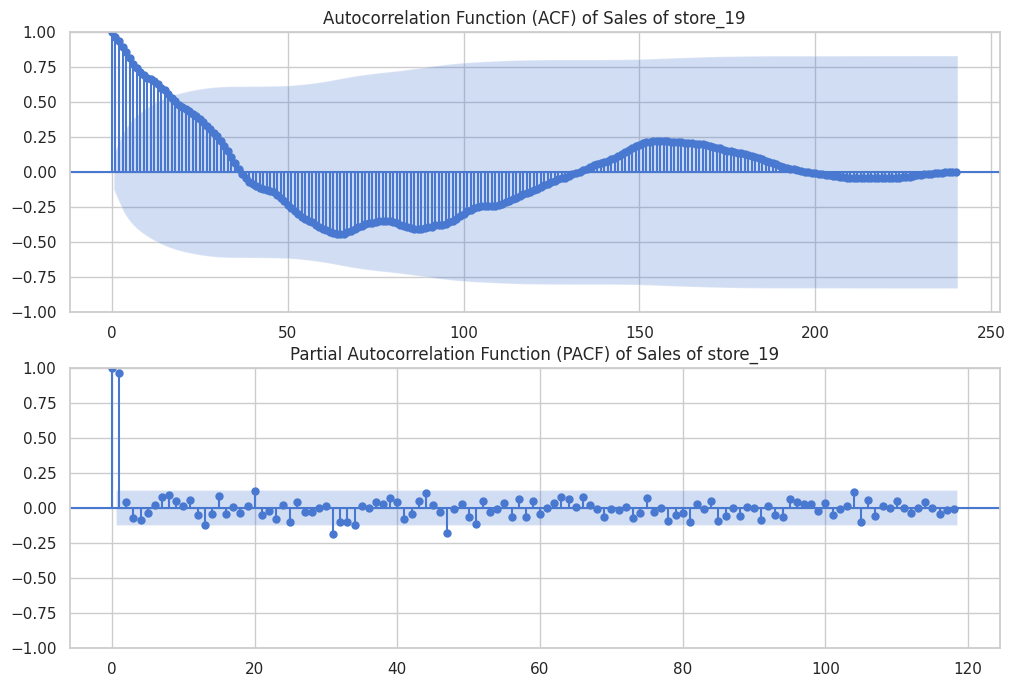

------------------------------
ADF Statistic: -2.105896794344462
p-value: 0.24215009154252864
TS is Stationary
------------------------------


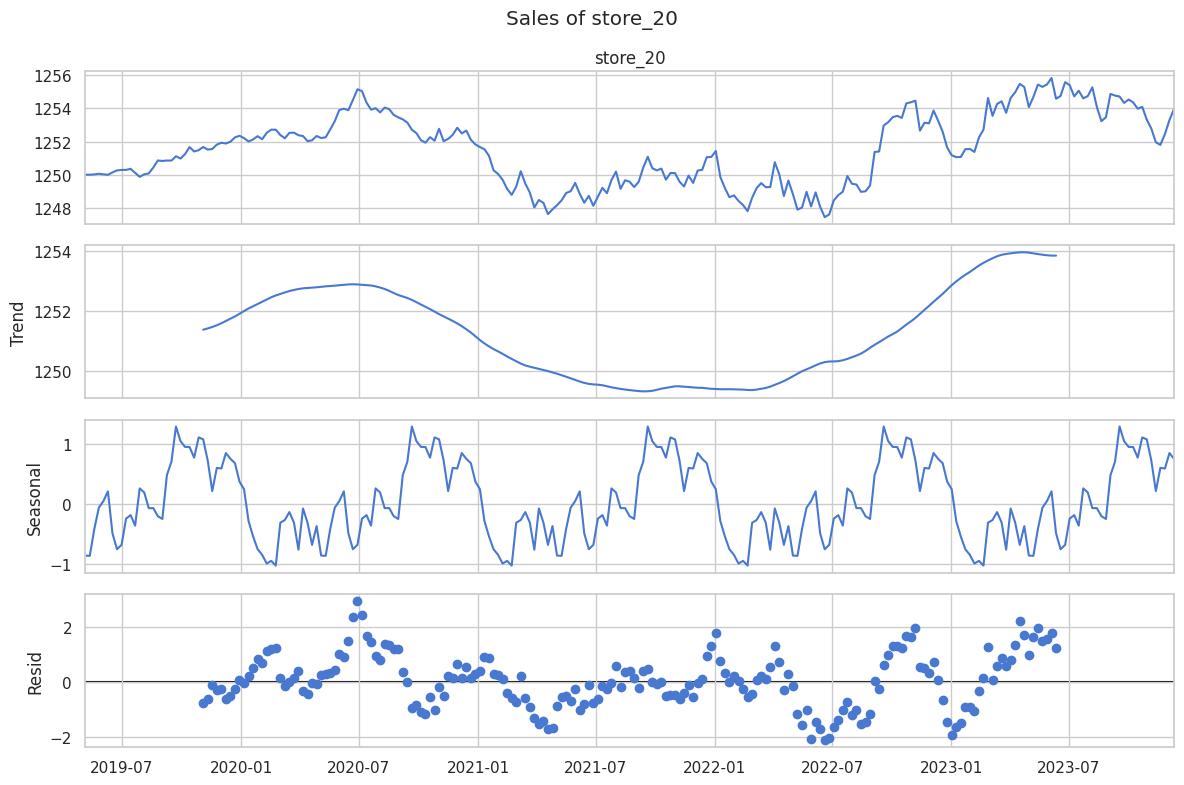

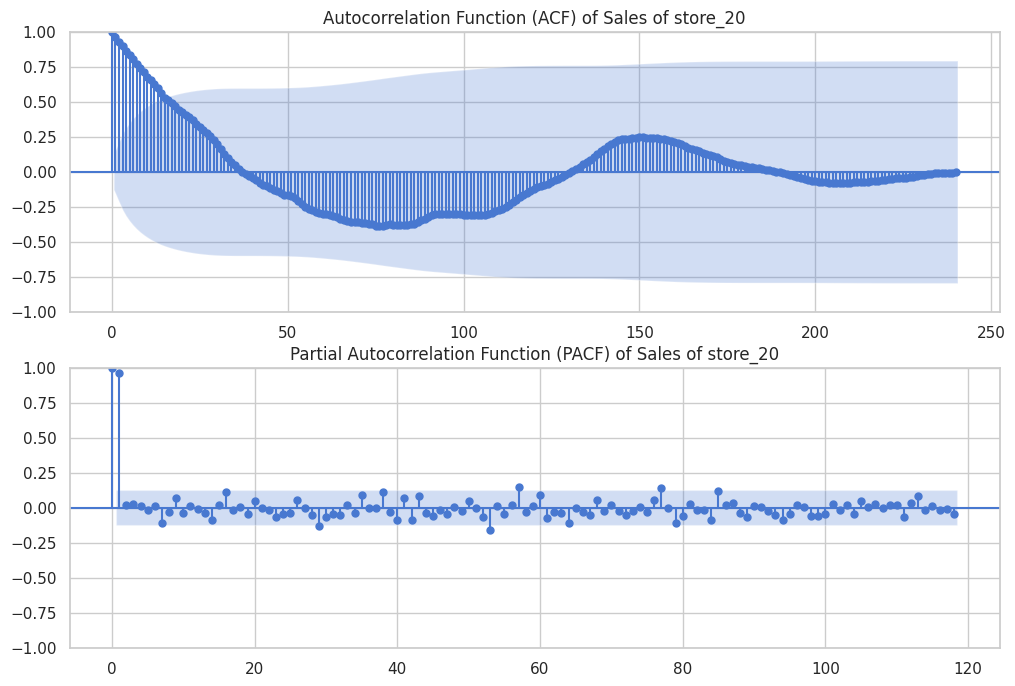

------------------------------
ADF Statistic: -1.9240758744290487
p-value: 0.3208211885542702
TS is Stationary
------------------------------


In [5]:
df_components = []
for c in df.columns[0:20]:
  df_temp, feat = time_series_analysis(df, column=c, lags=df.shape[0] - 1, save_fig=True)
  df_components.append(df_temp)

## Time Series Features

42 features were estimated with `tsfeature` library available in: https://github.com/Nixtla/tsfeatures

`tsfeature` receives a panel pandas df with columns unique_id, ds, y and optionally the frequency of the data

In [6]:
# !pip install tsfeatures

In [7]:
from tsfeatures import tsfeatures

In [8]:
#data transformation

df_features = df.copy()
all_data = pd.DataFrame()
for c in df_features.columns[0:100]:
  data = df_features[['Dates', c]].copy()
  data['unique_id'] = c
  data = data.rename(columns={'Dates': 'ds', c:'y'})
  data = data[['unique_id', 'ds', 'y']]
  data['ds'] = pd.to_datetime(data['ds'])
  data.to_csv(f'{main_dir}features/features_{c}.csv', sep=',', index=False)
  all_data = pd.concat([all_data, data], axis=0, ignore_index=True)

In [9]:
all_data.to_csv(f'{main_dir}features/all_data_features.csv', sep=',')

In [10]:
all_data.tail()

unique_id                         ds            y
24095  store_100 2023-11-12 14:54:17.349333  1257.196542
24096  store_100 2023-11-19 14:54:17.349333  1256.041119
24097  store_100 2023-11-26 14:54:17.349333  1255.174277
24098  store_100 2023-12-03 14:54:17.349333  1256.023861
24099  store_100 2023-12-10 14:54:17.349333  1256.429050

In [11]:
X_features_ts = tsfeatures(all_data, freq=1) #weekly

In [12]:
X_features_ts.isna().sum()

unique_id            0
hurst                0
series_length        0
unitroot_pp          0
unitroot_kpss        0
hw_alpha           100
hw_beta            100
hw_gamma           100
stability            0
nperiods             0
seasonal_period      0
trend                0
spike                0
linearity            0
curvature            0
e_acf1               0
e_acf10              0
x_pacf5              0
diff1x_pacf5         0
diff2x_pacf5         0
nonlinearity         0
lumpiness            0
alpha                0
beta                 0
arch_acf           100
garch_acf          100
arch_r2            100
garch_r2           100
flat_spots           0
entropy              0
crossing_points      0
arch_lm              0
x_acf1               0
x_acf10              0
diff1_acf1           0
diff1_acf10          0
diff2_acf1           0
diff2_acf10          0
dtype: int64

In [13]:
X_features_ts = X_features_ts.fillna(0)

In [14]:
X_features_ts.isna().sum()

unique_id          0
hurst              0
series_length      0
unitroot_pp        0
unitroot_kpss      0
hw_alpha           0
hw_beta            0
hw_gamma           0
stability          0
nperiods           0
seasonal_period    0
trend              0
spike              0
linearity          0
curvature          0
e_acf1             0
e_acf10            0
x_pacf5            0
diff1x_pacf5       0
diff2x_pacf5       0
nonlinearity       0
lumpiness          0
alpha              0
beta               0
arch_acf           0
garch_acf          0
arch_r2            0
garch_r2           0
flat_spots         0
entropy            0
crossing_points    0
arch_lm            0
x_acf1             0
x_acf10            0
diff1_acf1         0
diff1_acf10        0
diff2_acf1         0
diff2_acf10        0
dtype: int64

In [15]:
X_features_ts.to_csv(f'{main_dir}features/X_features_ts.csv', sep=',', index=False)

## Main Conclusions



* All time series, with the exception of store 64 sales, exhibit
stationarity, thereby greatly facilitating the forecasting estimation process for the models under consideration: AutoArima, ETS, and Theta.

* The presence of stationarity in time series data is paramount for forecasting methodologies, as it simplifies model parameter estimation and ensures the stability of statistical properties over time, thereby promoting the reliability and suitability of the forecasting process.

* We also noted that autocorrelation is particularly pronounced in both short and long time spans, evident in elevated values of the Autocorrelation Function (ACF) at lag 1 and lag 10, respectively. The presence of high autocorrelation signifies a persistent temporal dependence within the time series data. This temporal dependence entails that the observations at one time point are strongly influenced by their preceding values, reflecting a significant historical influence on the current and future states of the time series.

* The characteristics (features) of all time series have been computed and stored in a CSV file, serving as the X matrix for both base learner methods and the ensemble metalearner.
